<a href="https://colab.research.google.com/github/ParhamPishro/Flavonoid/blob/main/0%20Data/Flavonol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import chisquare
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE
from pylab import rcParams

from sklearn.preprocessing import MinMaxScaler , LabelEncoder#, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict, cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import mean_absolute_error, r2_score, get_scorer_names, pairwise, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
#from sklearn.feature_selection import chi2, RFE, RFECV, SelectKBest

from matplotlib import cm
from matplotlib.ticker import LinearLocator


In [ ]:
df = pd.read_excel("/content/FlavonolData.xlsx")
df

,authors,flavonol,cell line,time,dose,viability-mean,viability-error,viability-SD,viability-SE
0,Zhang and Zhao et al 2008,Quercetin,OE 33,24,10.0,76.334232,80.862534,4.528302,4.528302
1,Zhang and Zhao et al 2008,Quercetin,OE 33,24,20.0,66.954178,71.159030,4.204852,4.204852
2,Zhang and Zhao et al 2008,Quercetin,OE 33,24,40.0,58.867925,63.072776,4.204852,4.204852
3,Zhang and Zhao et al 2008,Quercetin,OE 33,24,80.0,52.398922,54.339623,1.940701,1.940701
4,Zhang and Zhao et al 2008,Quercetin,OE 33,48,10.0,72.129380,80.215633,8.086253,8.086253
...,...,...,...,...,...,...,...,...,...
358,Xin et al 2012,Quercetin,EC 109,48,12.5,89.101796,89.101796,0.001000,NaN
359,Xin et al 2012,Quercetin,EC 109,48,25.0,81.916168,81.916168,0.001000,NaN
360,Xin et al 2012,Quercetin,EC 109,48,50.0,64.670659,64.670659,0.001000,NaN
361,Xin et al 2012,Quercetin,EC 109,48,100.0,42.754491,42.754491,0.001000,NaN


In [ ]:
df[['authors', 'viability-mean', 'viability-SD']].groupby(['authors']).mean()


,viability-mean,viability-SD
authors,,
Han et al 2018,60.269564,1.399009
Li et al 2023,62.875710,4.330403
Qiao et al 2018,65.707837,7.232767
Ren et al 2016,61.122449,4.370748
Wang & Zhang & Zhao 2011,61.346546,1.723791
Wang and Chen et al 2022,83.840279,8.893585
Wang et al 2 2011,72.577498,2.377235
Xin 2008,58.918231,3.778971
Xin et al 2012,64.814371,0.001000


# Real Data


## DataFrames


In [ ]:
df.describe()

,time,dose,viability-mean,v01
count,363.000000,363.000000,363.000000,363.000000
mean,49.752066,38.696970,62.263088,0.250689
std,20.076490,33.335506,21.797044,0.434008
min,12.000000,1.000000,1.714286,0.000000
25%,24.000000,12.500000,50.122549,0.000000
50%,48.000000,30.000000,65.312500,0.000000
75%,72.000000,50.000000,78.973257,0.500000
max,120.000000,200.000000,105.376344,1.000000


In [ ]:
df['v01'] = 1
df['v01'][df['viability-mean']>50] = 0

<ipython-input-52-e187ea9b2767>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['v01'][df['viability-mean']>50] = 0
<ipython-input-52-e187ea9b2767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
df = df.drop(['authors', 'viability-error', 'viability-SD', 'viability-SE'], axis=1)
df

KeyError: "['authors', 'viability-error', 'viability-SD', 'viability-SE'] not found in axis"

In [ ]:
df_2 = df.copy()

In [ ]:
le_f = LabelEncoder() #1
le_c = LabelEncoder() #1

df_2['flavonol'] = le_f.fit_transform(df_2['flavonol']) #2,3
df_2['cell line'] = le_c.fit_transform(df_2['cell line']) #2,3


In [ ]:
#df['flavonol'] = le_f.inverse_transform(df['flavonol'])
#df['cell line'] = le_c.inverse_transform(df['cell line'])

In [ ]:
df_2

,flavonol,cell line,time,dose,viability-mean,v01
0,5,8,24,10.0,76.334232,0
1,5,8,24,20.0,66.954178,0
2,5,8,24,40.0,58.867925,0
3,5,8,24,80.0,52.398922,0
4,5,8,48,10.0,72.129380,0
...,...,...,...,...,...,...
358,5,0,48,12.5,89.101796,0
359,5,0,48,25.0,81.916168,0
360,5,0,48,50.0,64.670659,0
361,5,0,48,100.0,42.754491,1


In [ ]:
sc=MinMaxScaler()

df_2_scaled = pd.DataFrame(sc.fit_transform(df_2), columns=df_2.columns)
df_2_scaled

,flavonol,cell line,time,dose,viability-mean,v01
0,1.0,0.8,0.111111,0.045226,0.719839,0.0
1,1.0,0.8,0.111111,0.095477,0.629352,0.0
2,1.0,0.8,0.111111,0.195980,0.551346,0.0
3,1.0,0.8,0.111111,0.396985,0.488941,0.0
4,1.0,0.8,0.333333,0.045226,0.679275,0.0
...,...,...,...,...,...,...
358,1.0,0.0,0.333333,0.057789,0.843004,0.0
359,1.0,0.0,0.333333,0.120603,0.773686,0.0
360,1.0,0.0,0.333333,0.246231,0.607323,0.0
361,1.0,0.0,0.333333,0.497487,0.395904,1.0


In [ ]:
df_encoded = pd.get_dummies(df, dtype=int)

In [ ]:
df_encoded

,time,dose,viability-mean,v01,flavonol_Casticin,flavonol_Galangin,flavonol_Icaritin,flavonol_Kaempferol,flavonol_Myricetin,flavonol_Quercetin,...,cell line_EC 9706,cell line_HEN 1,cell line_HET 1A,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 510,cell line_OE 19,cell line_OE 33,cell line_TE 1,cell line_TE 7
0,24,10.0,76.334232,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,24,20.0,66.954178,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,24,40.0,58.867925,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,24,80.0,52.398922,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,48,10.0,72.129380,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,48,12.5,89.101796,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
359,48,25.0,81.916168,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
360,48,50.0,64.670659,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
361,48,100.0,42.754491,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded_scaled = pd.DataFrame(sc.fit_transform(df_encoded), columns=df_encoded.columns)
df_encoded_scaled

,time,dose,viability-mean,v01,flavonol_Casticin,flavonol_Galangin,flavonol_Icaritin,flavonol_Kaempferol,flavonol_Myricetin,flavonol_Quercetin,...,cell line_EC 9706,cell line_HEN 1,cell line_HET 1A,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 510,cell line_OE 19,cell line_OE 33,cell line_TE 1,cell line_TE 7
0,0.111111,0.045226,0.719839,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.111111,0.095477,0.629352,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.111111,0.195980,0.551346,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.111111,0.396985,0.488941,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.333333,0.045226,0.679275,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.333333,0.057789,0.843004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,0.333333,0.120603,0.773686,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360,0.333333,0.246231,0.607323,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,0.333333,0.497487,0.395904,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Outlier Handling

<Axes: >

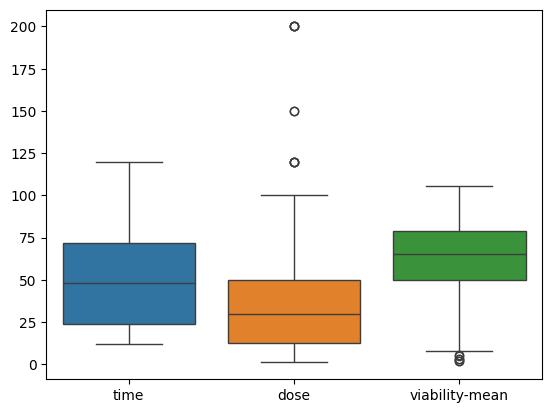

In [ ]:
sns.boxplot(df[['time', 'dose', 'viability-mean']])

## Correlation

In [ ]:
df['flavonol'].unique()

array(['Quercetin', 'Kaempferol', 'Myricetin', 'Galangin', 'Casticin',
       'Icaritin'], dtype=object)

<Axes: >

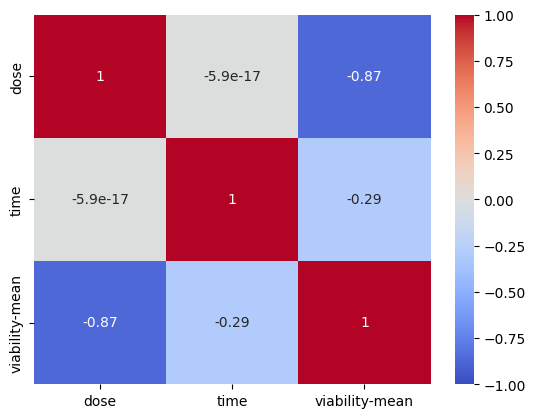

In [ ]:
matrix11 = df.loc[df['flavonol']=='Casticin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix11, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

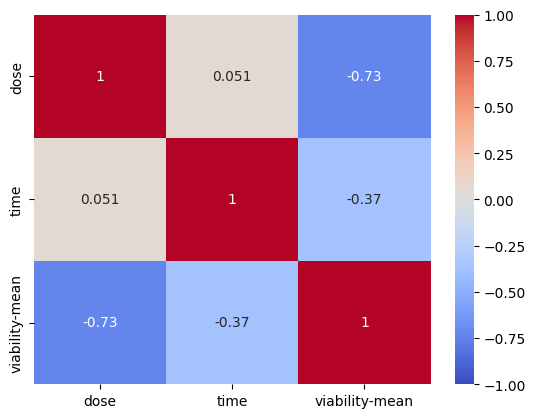

In [ ]:
matrix12 = df.loc[df['flavonol']=='Galangin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix12, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

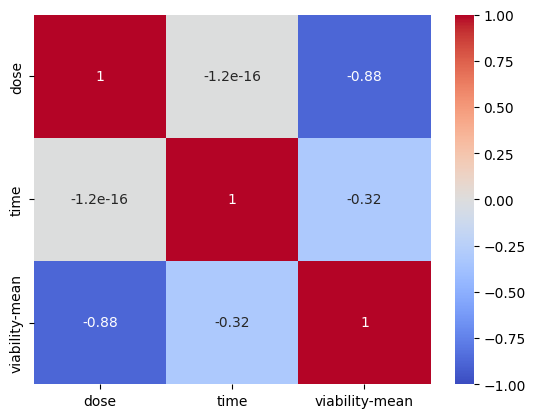

In [ ]:
matrix21 = df.loc[df['flavonol']=='Icaritin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix21, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

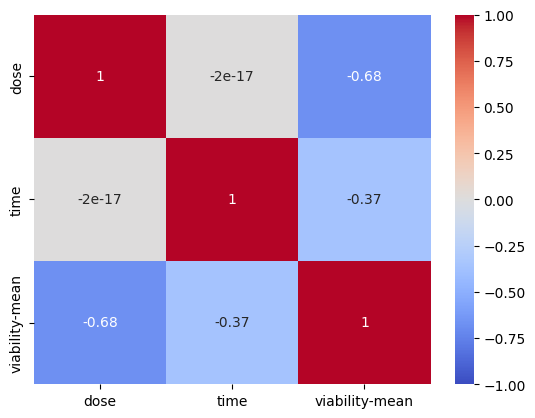

In [ ]:
matrix22 = df.loc[df['flavonol']=='Kaempferol', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix22, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

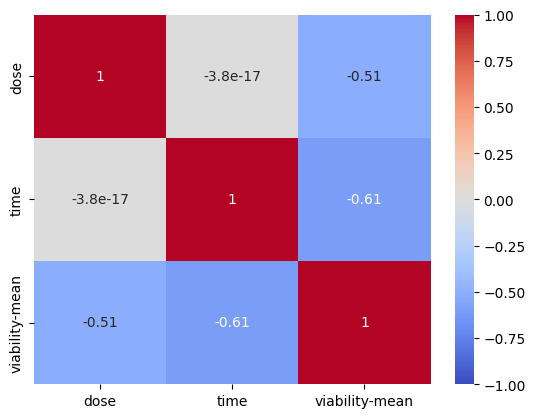

In [ ]:
matrix31 = df.loc[df['flavonol']=='Myricetin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix31, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

<Axes: >

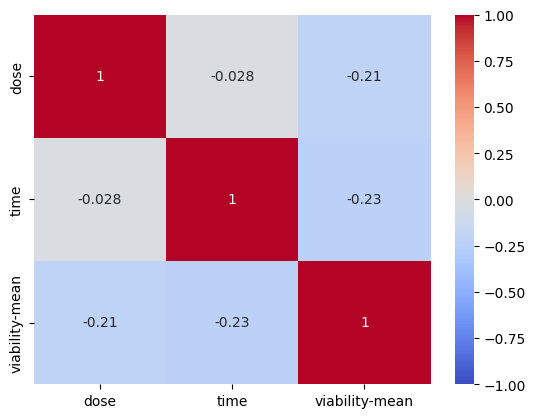

In [ ]:
matrix32 = df.loc[df['flavonol']=='Quercetin', ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix32, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

In [ ]:
#Correlation

df.loc[:, ['dose', 'time', 'viability-mean']].corr()

,dose,time,viability-mean
dose,1.000000,-0.005990,-0.424289
time,-0.005990,1.000000,-0.334198
viability-mean,-0.424289,-0.334198,1.000000


<Axes: >

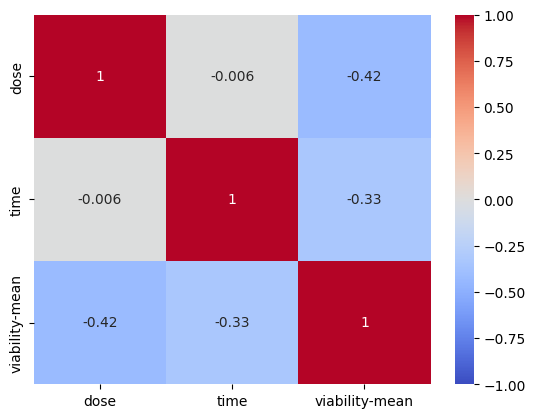

In [ ]:
matrix = df.loc[:, ['dose', 'time', 'viability-mean']].corr()
sns.heatmap(matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)

Text(0.5, 1.0, 'All flavonols')

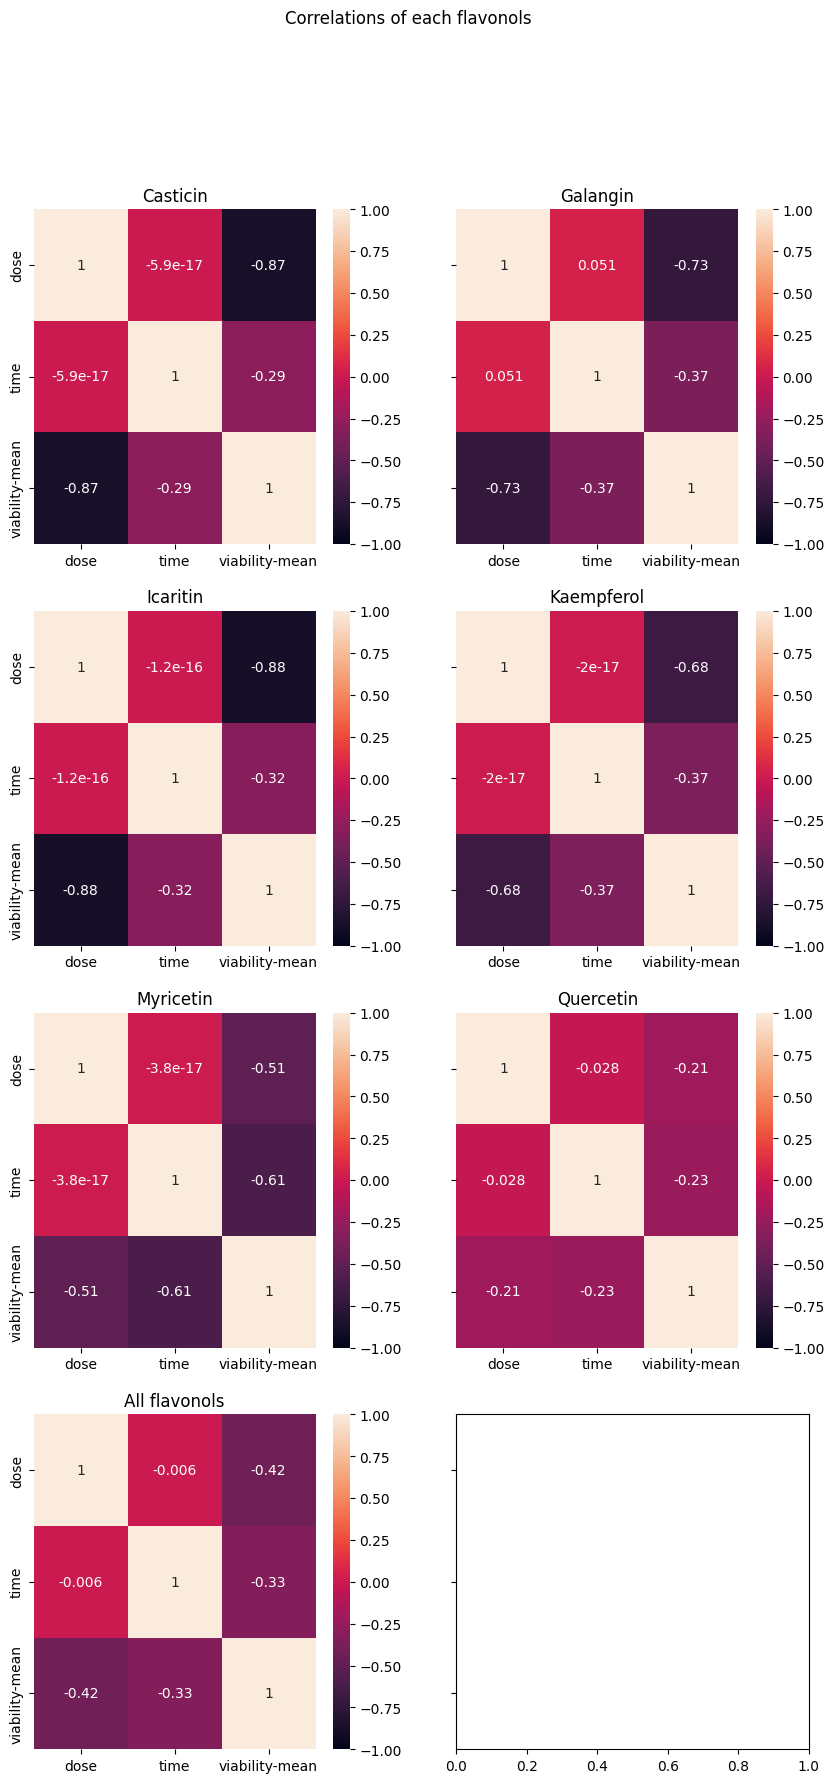

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20), sharey=True)
fig.suptitle('Correlations of each flavonols')

sns.heatmap(matrix11, vmin=-1, vmax=1, annot=True, ax=axes[0, 0])
axes[0, 0].set_title('Casticin')

sns.heatmap(matrix12, vmin=-1, vmax=1, annot=True, ax=axes[0, 1])
axes[0, 1].set_title('Galangin')

sns.heatmap(matrix21, vmin=-1, vmax=1, annot=True, ax=axes[1, 0])
axes[1, 0].set_title('Icaritin')

sns.heatmap(matrix22, vmin=-1, vmax=1, annot=True, ax=axes[1, 1])
axes[1, 1].set_title('Kaempferol')

sns.heatmap(matrix31, vmin=-1, vmax=1, annot=True, ax=axes[2, 0])
axes[2, 0].set_title('Myricetin')

sns.heatmap(matrix32, vmin=-1, vmax=1, annot=True, ax=axes[2, 1])
axes[2, 1].set_title('Quercetin')

sns.heatmap(matrix, vmin=-1, vmax=1, annot=True, ax=axes[3, 0])
axes[3, 0].set_title('All flavonols')


In [ ]:
df_2.corr()

,flavonol,cell line,time,dose,viability-mean,v01
flavonol,1.000000,0.172309,-0.059093,0.322356,0.063774,-0.009302
cell line,0.172309,1.000000,-0.032075,-0.061319,0.056446,-0.062075
time,-0.059093,-0.032075,1.000000,-0.005990,-0.334198,0.261414
dose,0.322356,-0.061319,-0.005990,1.000000,-0.424289,0.438880
viability-mean,0.063774,0.056446,-0.334198,-0.424289,1.000000,-0.794144
v01,-0.009302,-0.062075,0.261414,0.438880,-0.794144,1.000000


In [ ]:
df_encoded.corr()

,time,dose,viability-mean,v01,flavonol_Casticin,flavonol_Galangin,flavonol_Icaritin,flavonol_Kaempferol,flavonol_Myricetin,flavonol_Quercetin,...,cell line_EC 9706,cell line_HEN 1,cell line_HET 1A,cell line_KYSE 150,cell line_KYSE 30,cell line_KYSE 510,cell line_OE 19,cell line_OE 33,cell line_TE 1,cell line_TE 7
time,1.000000,-0.005990,-0.334198,0.261414,-0.028996,0.058521,0.205181,-0.050177,-0.038888,-0.033709,...,-0.019961,-0.129500,0.076732,-0.016842,-0.014709,-0.028631,0.076732,-0.043469,-0.023767,0.131143
dose,-0.005990,1.000000,-0.424289,0.438880,-0.257786,-0.083855,0.010709,-0.029269,-0.036051,0.303977,...,0.010847,0.176287,-0.005398,0.138917,0.148155,-0.015173,-0.005398,-0.017885,-0.189184,0.040126
viability-mean,-0.334198,-0.424289,1.000000,-0.794144,0.052509,-0.226515,-0.016934,0.115755,0.208321,-0.115983,...,0.012426,0.143291,-0.061542,0.087334,0.005895,-0.117404,-0.166132,0.094572,0.051635,0.125228
v01,0.261414,0.438880,-0.794144,1.000000,-0.085589,0.173375,-0.000294,-0.081871,-0.154716,0.114339,...,-0.015002,-0.083956,0.043057,-0.043063,-0.058519,0.156028,0.129648,-0.160191,-0.031807,-0.068356
flavonol_Casticin,-0.028996,-0.257786,0.052509,-0.085589,1.000000,-0.160742,-0.061350,-0.190510,-0.147649,-0.198956,...,-0.075789,-0.080121,-0.049809,-0.063946,-0.055846,-0.240461,-0.049809,-0.165043,0.564889,-0.039212
flavonol_Galangin,0.058521,-0.083855,-0.226515,0.173375,-0.160742,1.000000,-0.089575,-0.278158,-0.215578,-0.290490,...,0.115735,-0.116982,0.309870,-0.093366,-0.081539,0.003541,0.309870,-0.240974,0.062325,-0.057252
flavonol_Icaritin,0.205181,0.010709,-0.016934,-0.000294,-0.061350,-0.089575,1.000000,-0.106164,-0.082279,-0.110871,...,-0.042234,-0.044648,-0.027757,-0.035635,-0.031121,-0.134000,-0.027757,-0.091972,-0.050286,-0.021851
flavonol_Kaempferol,-0.050177,-0.029269,0.115755,-0.081871,-0.190510,-0.278158,-0.106164,1.000000,-0.255502,-0.344286,...,-0.131149,-0.138646,-0.086193,0.198331,-0.096639,0.228360,-0.086193,0.098374,-0.156153,-0.067855
flavonol_Myricetin,-0.038888,-0.036051,0.208321,-0.154716,-0.147649,-0.215578,-0.082279,-0.255502,1.000000,-0.266830,...,0.103338,-0.107454,-0.066801,-0.085761,0.196980,0.052115,-0.066801,0.225036,-0.121022,-0.052589
flavonol_Quercetin,-0.033709,0.303977,-0.115983,0.114339,-0.198956,-0.290490,-0.110871,-0.344286,-0.266830,1.000000,...,0.006896,0.402706,-0.090014,0.018890,0.051723,-0.053342,-0.090014,0.077673,-0.163077,0.197090


## EFS

In [ ]:
#df_2
X = df_2[['flavonol', 'cell line', 'time', 'dose']]
y = df_2['viability-mean']

#df_2_scaled
X_scaled = df_2_scaled[['flavonol', 'cell line', 'time', 'dose']]
y_scaled = df_2_scaled['viability-mean']

#df_encoded
X_encoded = df_encoded.drop(['viability-mean', 'v01'], axis=1)
y_encoded = df_encoded['viability-mean']

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['viability-mean', 'v01'], axis=1)
y_encoded_scaled = df_encoded_scaled['viability-mean']


In [ ]:
knr = KNeighborsRegressor()
svr = SVR()
lir = LinearRegression()
rig = Ridge()
las = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

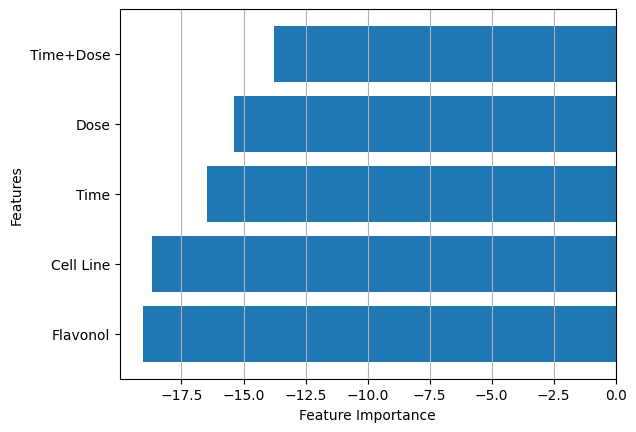

In [ ]:
y_for_bar=['Flavonol', 'Cell Line', 'Time', 'Dose', 'Time+Dose']

# getting values against each value of y
x_for_bar=[-19.034105536699762, -18.682126334261216, -16.481919191775415, -15.395223621116134, -13.786928147721195]
plt.barh(y_for_bar, x_for_bar)

# setting label of y-axis
plt.ylabel("Features")

# setting label of x-axis
plt.xlabel("Feature Importance")
#plt.title("Horizontal bar graph")
plt.grid(axis='x')
plt.show()

In [ ]:
efs = EFS(dtr, min_features=1, max_features=2, scoring='neg_mean_absolute_error', print_progress=True, cv=5)
efs = efs.fit(X, y)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
efs.subsets_

Features: 10/10

Best accuracy score:  -13.786928147721198
Best subset (indices): (2, 3)
Best subset (corresponding names): ('time', 'dose')


{0: {'feature_idx': (0,),
  'cv_scores': array([-17.53716218, -18.0843748 , -17.30364185, -17.56356808,
         -24.68178078]),
  'avg_score': -19.034105536699762,
  'feature_names': ('flavonol',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-17.82746048, -17.92908235, -18.54442646, -20.46303306,
         -18.64662932]),
  'avg_score': -18.682126334261216,
  'feature_names': ('cell line',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([-16.04297563, -16.38619562, -15.98469611, -17.4404686 ,
         -16.55525999]),
  'avg_score': -16.481919191775415,
  'feature_names': ('time',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-15.5503996 , -15.75008829, -12.29531112, -16.98681034,
         -16.39350876]),
  'avg_score': -15.395223621116134,
  'feature_names': ('dose',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([-15.17089981, -15.22027595, -20.56339372, -20.58550673,
         -30.41461254]),
  'avg_score': -20.39093775039172,
  'feature_names': ('flavonol', 'cell lin

In [ ]:
efs = EFS(dtr, min_features=1, max_features=3, scoring='neg_mean_absolute_error', print_progress=True, cv=5)
efs = efs.fit(X_scaled, y_scaled)

print('Best accuracy score: ', efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
efs.subsets_

Features: 14/14

Best accuracy score:  -0.13342769815620883
Best subset (indices): (2, 3)
Best subset (corresponding names): ('time', 'dose')


{0: {'feature_idx': (0,),
  'cv_scores': array([-0.16917629, -0.1744551 , -0.16692358, -0.16943102, -0.2380985 ]),
  'avg_score': -0.18361689740370463,
  'feature_names': ('flavonol',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([-0.17197672, -0.17295704, -0.1788931 , -0.193042  , -0.17987902]),
  'avg_score': -0.17934957360608297,
  'feature_names': ('cell line',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([-0.15476227, -0.15807322, -0.15420006, -0.16824351, -0.15970414]),
  'avg_score': -0.1589966420758379,
  'feature_names': ('time',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-0.15001052, -0.15193687, -0.11860956, -0.16386719, -0.15814377]),
  'avg_score': -0.1485135821431251,
  'feature_names': ('dose',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([-0.14634959, -0.14682591, -0.19836953, -0.19858285, -0.29340159]),
  'avg_score': -0.19670589288579626,
  'feature_names': ('flavonol', 'cell line')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([-0.1383860

## Data Visualization

### Boxplot

<Axes: >

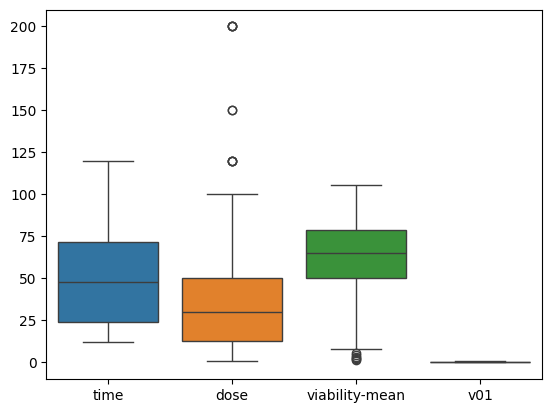

In [ ]:
sns.boxplot(df)

### Donut Chart

In [ ]:
flavo_count = df['flavonol'].value_counts()
cell_line_count = df['cell line'].value_counts()


In [ ]:
df['cell line'].value_counts()

,count
cell line,
KYSE 510,125
OE 33,72
EC 109,59
TE 1,25
HEN 1,20
EC 9706,18
KYSE 150,13
KYSE 30,10
HET 1A,8


In [ ]:
flavonol_labels = ["Quercetin", "Kaempferol", "Galangin", "Myricetin", "Casticin", "Icaritin"]
cell_line_labels = ["KYSE 510", "OE 33", "EC 109", "TE 1", "HEN 1", "EC 9706", "KYSE 150", "KYSE 30", 'HET 1A', 'OE 19', "TE 7"]


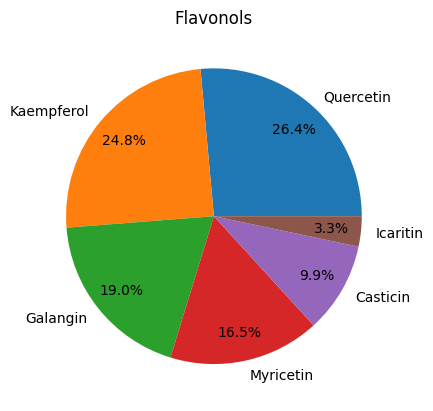

In [ ]:
# explosion
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Pie Chart
plt.pie(flavo_count, labels=flavonol_labels, autopct='%1.1f%%', pctdistance=0.8)#, explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Flavonols')

# Displaying Chart
plt.show()


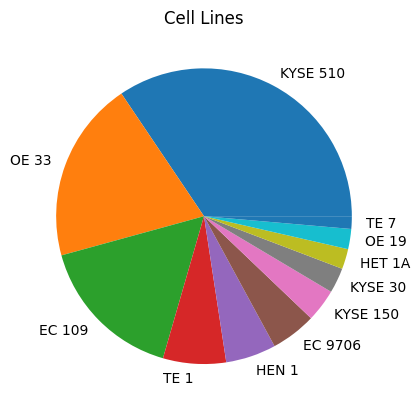

In [ ]:
# explosion
explode = (0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)

# Pie Chart
plt.pie(cell_line_count, labels=cell_line_labels, pctdistance=0.85)#, explode=explode) #autopct='%1.1f%%'

# draw circle
centre_circle = plt.Circle((0, 0), 0, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart (donut churt)
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Cell Lines')

# Displaying Chart
plt.show()


### 3D Scatter Plot

In [ ]:
cas = df['flavonol']=='Casticin'
gal = df['flavonol']=='Galangin'
ica = df['flavonol']=='Icaritin'
kae = df['flavonol']=='Kaempferol'
myr = df['flavonol']=='Myricetin'
que = df['flavonol']=='Quercetin'

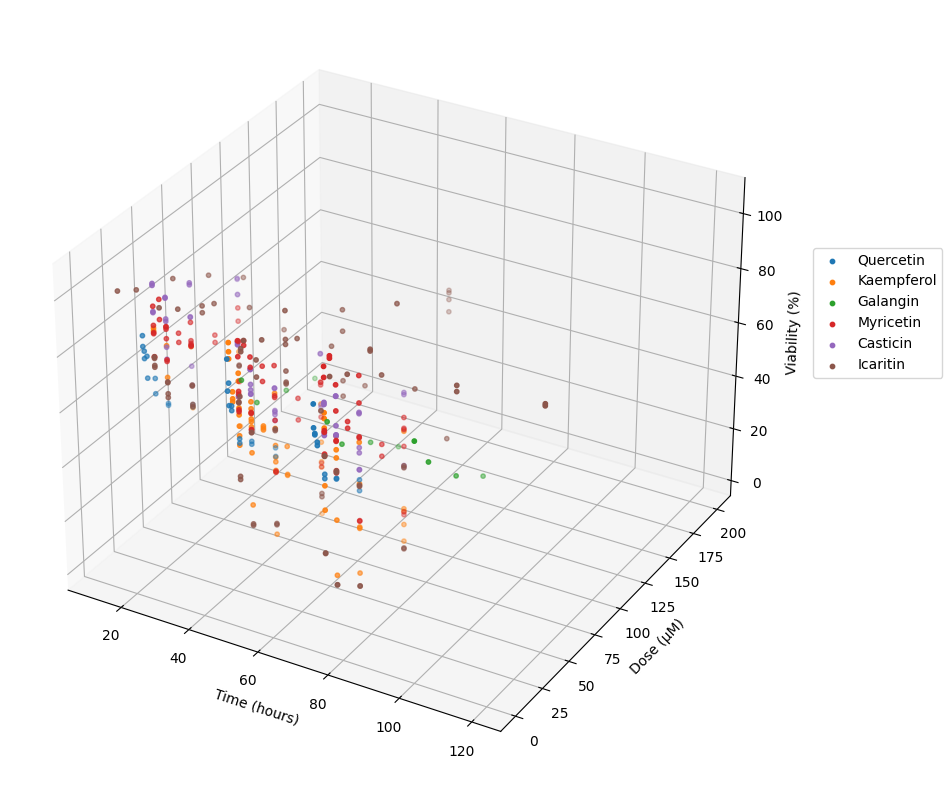

In [ ]:
# 3D Plot
fig = plt.figure(figsize=(10,10))
ax3D = fig.add_subplot(111, projection='3d')

p3d = ax3D.scatter(df['time'][cas], df['dose'][cas], df['viability-mean'][cas], s=10)#, c=df_2['flavonol'])
p3d = ax3D.scatter(df['time'][gal], df['dose'][gal], df['viability-mean'][gal], s=10)
p3d = ax3D.scatter(df['time'][ica], df['dose'][ica], df['viability-mean'][ica], s=10)
p3d = ax3D.scatter(df['time'][kae], df['dose'][kae], df['viability-mean'][kae], s=10)
p3d = ax3D.scatter(df['time'][myr], df['dose'][myr], df['viability-mean'][myr], s=10)
p3d = ax3D.scatter(df['time'][que], df['dose'][que], df['viability-mean'][que], s=10)

ax3D.set_xlabel('Time (hours)')
ax3D.set_ylabel('Dose (μM)')
ax3D.set_zlabel('Viability (%)')

ax3D.legend(flavonol_labels, bbox_to_anchor=(1.22, 0.7))

plt.show()

### 2D Scatter Plots

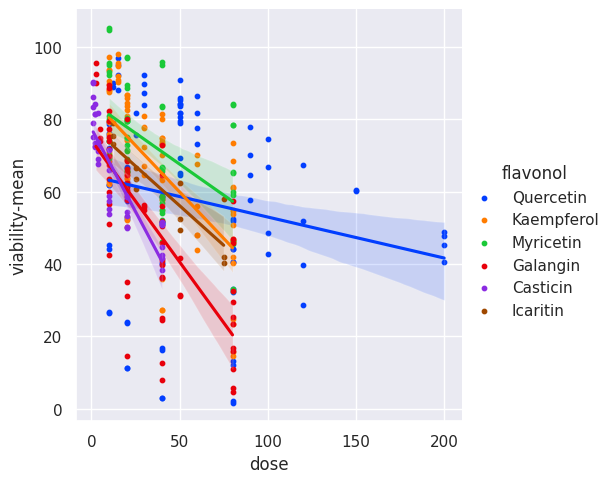

In [ ]:
sns.set(style="darkgrid") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavonol", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


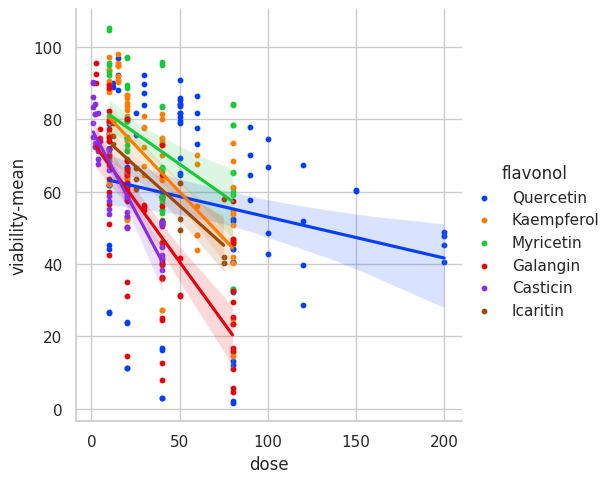

In [ ]:
sns.set(style="whitegrid") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavonol", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


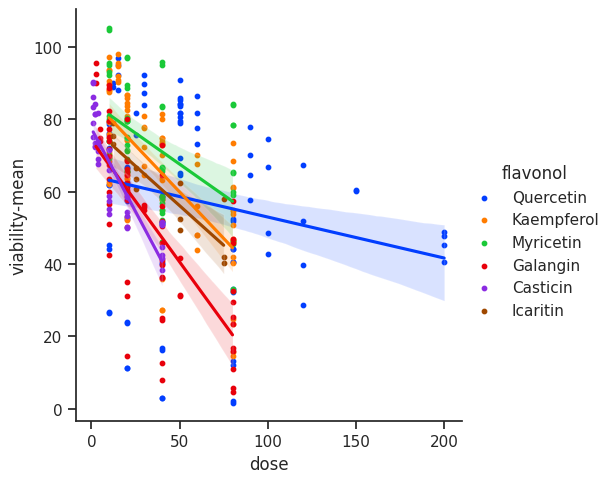

In [ ]:
sns.set(style="ticks") #darkgrid, whitegrid, dark, white, and ticks.
sns.lmplot(x="dose", y="viability-mean", hue="flavonol", data=df, palette="bright", scatter_kws={"s": 10, "alpha": 1})


## KFold

In [ ]:
#df_2
X = df_2[['time', 'dose']]
#Xo = df_2[['time', 'dose-out']]

#df_2_scaled
X_scaled = df_2_scaled[['time', 'dose']]
#Xo_scaled = df_2_scaled[['time', 'dose-out']]

#df_encoded
X_encoded = df_encoded.drop(['viability-mean', 'v01'], axis=1)
#Xo_encoded = df_encoded.drop(['dose', 'viability-mean', 'v01'], axis=1)

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['viability-mean', 'v01'], axis=1)
#Xo_encoded_scaled = df_encoded_scaled.drop(['dose', 'viability-mean', 'v01'], axis=1)

list_X = [X, X_scaled, X_encoded, X_encoded_scaled]

y01 = df['v01']

In [ ]:
#initialize

knc = KNeighborsClassifier()
svc = SVC()
lor = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


In [ ]:
result = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
for x in list_X:
  for i in range(10):
    kf = KFold(n_splits=10, shuffle=True, random_state=i)
    result[i] = cross_val_score(rfc, x, y01, cv=kf, scoring='accuracy').mean()
  print(result.mean())

0.8158633633633634
0.8142567567567568
0.8855930930930931
0.8836561561561561


In [ ]:
#knc: X_encoded_scaled
#svc: X_encoded
#lor: X_encoded
#dtc: X_encoded
#rfc: X_encoded

## Hyperparameter Tuning

In [ ]:
#df['v01'] = 1
#df['v01'][df['viability-mean']>50] = 0

In [ ]:
#df_2
X = df_2[['time', 'dose']]
#Xo = df_2[['time', 'dose-out']]

#df_2_scaled
X_scaled = df_2_scaled[['time', 'dose']]
#Xo_scaled = df_2_scaled[['time', 'dose-out']]

#df_encoded
X_encoded = df_encoded.drop(['viability-mean', 'v01'], axis=1)
#Xo_encoded = df_encoded.drop(['dose', 'viability-mean', 'v01'], axis=1)

#df_encoded_scaled
X_encoded_scaled = df_encoded_scaled.drop(['viability-mean', 'v01'], axis=1)
#Xo_encoded_scaled = df_encoded_scaled.drop(['dose', 'viability-mean', 'v01'], axis=1)

list_X = [X, X_scaled, X_encoded, X_encoded_scaled]

y01 = df['v01']

In [ ]:
#initialize

knc = KNeighborsClassifier()
svc = SVC()
lor = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


### KNN

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X_encoded, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

CPU times: user 27.6 s, sys: 225 ms, total: 27.9 s
Wall time: 18.3 s
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.8673515981735159


[0.85350076 0.85909437 0.84798326 0.8673516  0.85353881 0.85076104
 0.85627854 0.85353881 0.85353881 0.84798326 0.84798326 0.84798326
 0.84798326 0.84798326 0.84520548 0.84520548 0.84520548 0.85076104
 0.84520548 0.84520548 0.84798326 0.8424277  0.8424277  0.8424277
 0.8424277  0.83964992 0.8424277  0.84520548 0.85076104 0.84798326
 0.8424277  0.84798326 0.84520548 0.83964992 0.85353881 0.84798326
 0.86187215 0.86187215 0.84798326 0.84798326 0.85076104 0.85076104
 0.85076104 0.84798326 0.84520548 0.86464992 0.85353881 0.86464992
 0.86464992]


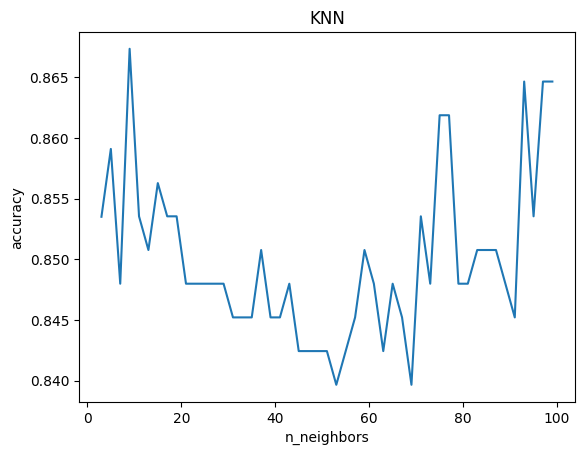

In [ ]:
param_kn = {'n_neighbors': range(3, 100, 2),
            'weights': ['distance'],
            'metric': ['euclidean']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X_encoded, y01)
print(gs_kn.cv_results_['mean_test_score'])

plt.plot(range(3, 100, 2), gs_kn.cv_results_['mean_test_score'])

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN')

plt.show()

CPU times: user 618 ms, sys: 3.78 ms, total: 622 ms
Wall time: 343 ms
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.8673515981735159


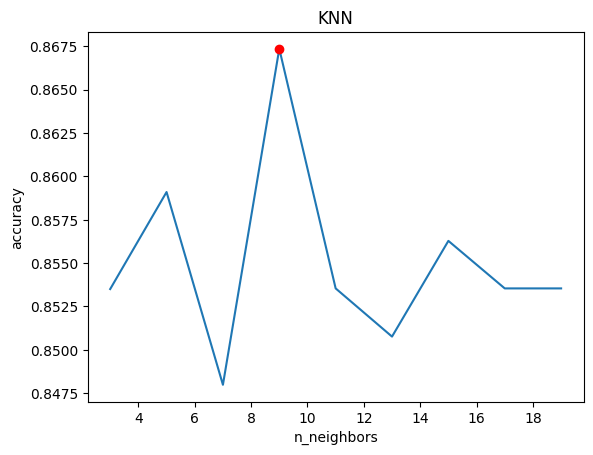

In [ ]:
param_kn = {'n_neighbors': range(3, 20, 2),
            'weights': ['distance'],
            'metric': ['euclidean']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
%time gs_kn.fit(X_encoded, y01)
print(gs_kn.best_params_)
print(gs_kn.best_score_)

plt.plot(range(3, 20, 2), gs_kn.cv_results_['mean_test_score'])

plt.plot(9, 0.8673515981735159, 'ro')

plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('KNN')

plt.show()

In [ ]:
param_kn = {'n_neighbors': [9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']}
gs_kn = GridSearchCV(knc, param_kn, cv=5, scoring='accuracy')
gs_kn.fit(X_encoded, y01)
print(gs_kn.cv_results_['mean_test_score'])

print(gs_kn.cv_results_['params'])

[0.80966514 0.8673516  0.80688737 0.85901826 0.80966514 0.8673516 ]
[{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}, {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}, {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}, {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}, {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}, {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'}]


### SVM

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': [2**_ for _ in range(-15,6)]}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

CPU times: user 11.7 s, sys: 1.21 ms, total: 11.7 s
Wall time: 11.8 s
{'C': 0.03125, 'kernel': 'linear'}
0.7849315068493151


[0.75487062 0.74375951 0.75745814 0.7630137  0.77671233 0.76575342
 0.77127093 0.76849315 0.78215373 0.7848554  0.78493151 0.77370624
 0.75726788 0.74063927 0.74063927 0.73508371 0.71841705 0.70722983
 0.71818874 0.72366819 0.71815068]


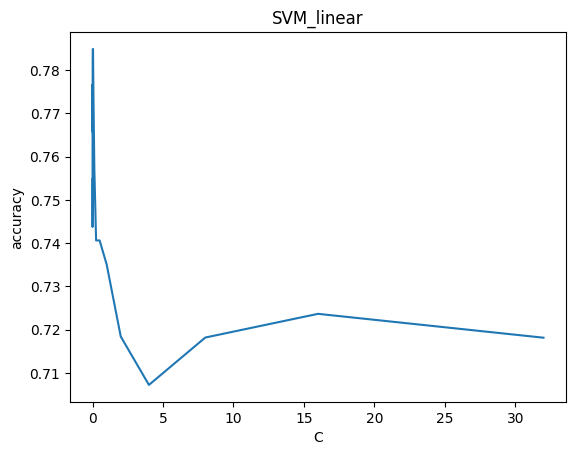

In [ ]:
print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,6)], gs_sv_l.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

CPU times: user 933 ms, sys: 4 ms, total: 937 ms
Wall time: 937 ms
{'C': 0.03125, 'kernel': 'linear'}
0.7849315068493151


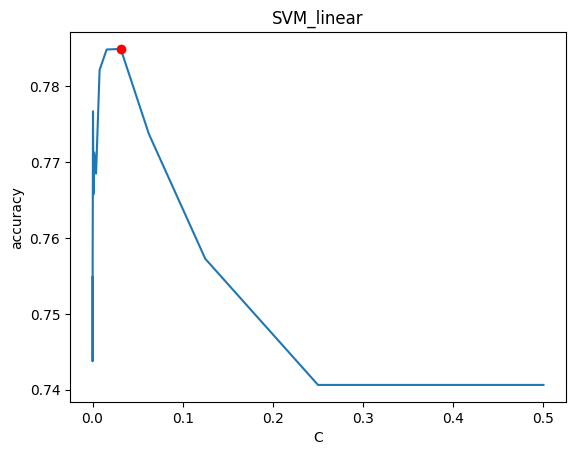

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': [2**_ for _ in range(-15,0)]}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

plt.plot([2**_ for _ in range(-15,0)], gs_sv_l.cv_results_['mean_test_score'])
plt.plot(0.03125, 0.7849315068493151, 'ro')

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

CPU times: user 489 ms, sys: 27 µs, total: 489 ms
Wall time: 487 ms
{'C': 0.045, 'kernel': 'linear'}
0.7903729071537291


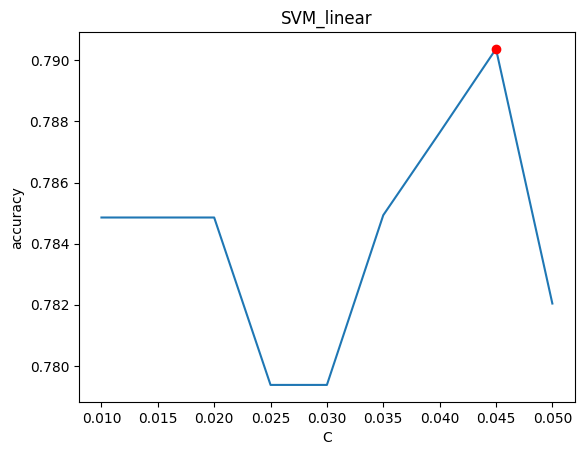

In [ ]:
param_sv_l = {'kernel': ['linear'],
            'C': (0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050)}
gs_sv_l = GridSearchCV(svc, param_sv_l, cv=5, scoring='accuracy')
%time gs_sv_l.fit(X_encoded, y01)
print(gs_sv_l.best_params_)
print(gs_sv_l.best_score_)

plt.plot((0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050), gs_sv_l.cv_results_['mean_test_score'])
plt.plot(0.045, 0.7903729071537291, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_linear')

plt.show()

In [ ]:
gamma_rbf = [2**_ for _ in range(-15,10)]
gamma_rbf.insert(0,0)

param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': gamma_rbf}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

CPU times: user 35.6 s, sys: 91.8 ms, total: 35.7 s
Wall time: 35.9 s
{'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326


CPU times: user 1.43 s, sys: 5.03 ms, total: 1.44 s
Wall time: 1.44 s
{'C': 2, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326
[0.7848554  0.7848554  0.7848554  0.77937595 0.77937595 0.78493151
 0.78763318 0.79037291 0.78203957]


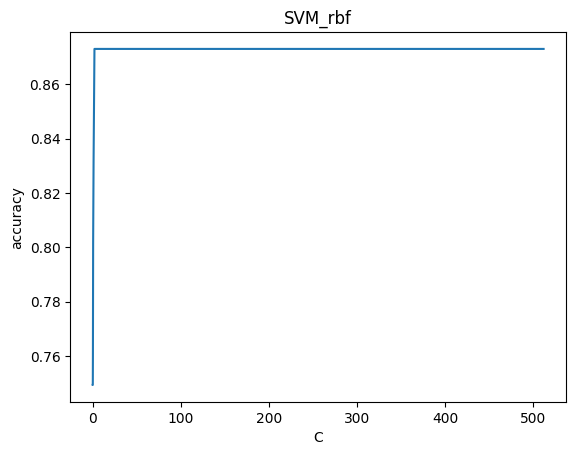

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': [0.5]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,10)], gs_sv_r.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 919 ms, sys: 998 µs, total: 920 ms
Wall time: 920 ms
{'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326
[0.7848554  0.7848554  0.7848554  0.77937595 0.77937595 0.78493151
 0.78763318 0.79037291 0.78203957]


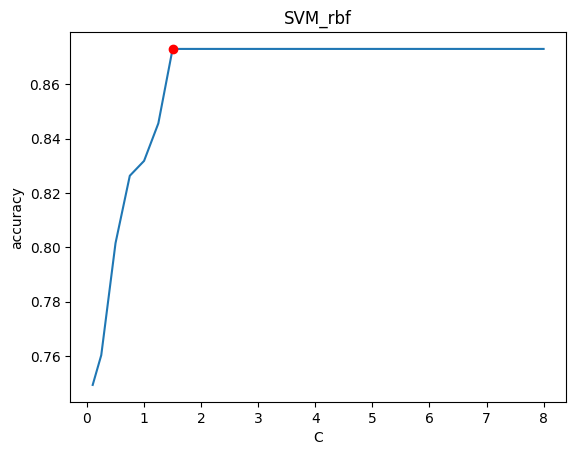

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 6, 7, 8],
            'gamma': [0.5]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 3, 4, 5, 6, 7, 8], gs_sv_r.cv_results_['mean_test_score'])
plt.plot(1.5, 0.8729832572298326, 'ro')


plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 1.31 s, sys: 1.97 ms, total: 1.32 s
Wall time: 1.31 s
{'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326
[0.7848554  0.7848554  0.7848554  0.77937595 0.77937595 0.78493151
 0.78763318 0.79037291 0.78203957]


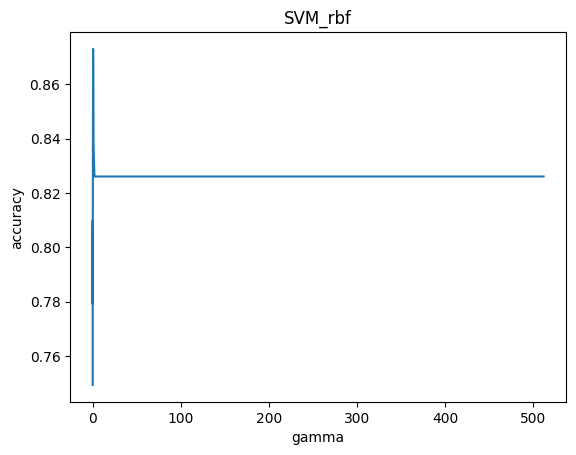

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [1.5],
            'gamma': gamma_rbf}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot(gamma_rbf, gs_sv_r.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

CPU times: user 879 ms, sys: 1 ms, total: 880 ms
Wall time: 878 ms
{'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326
[0.7848554  0.7848554  0.7848554  0.77937595 0.77937595 0.78493151
 0.78763318 0.79037291 0.78203957]


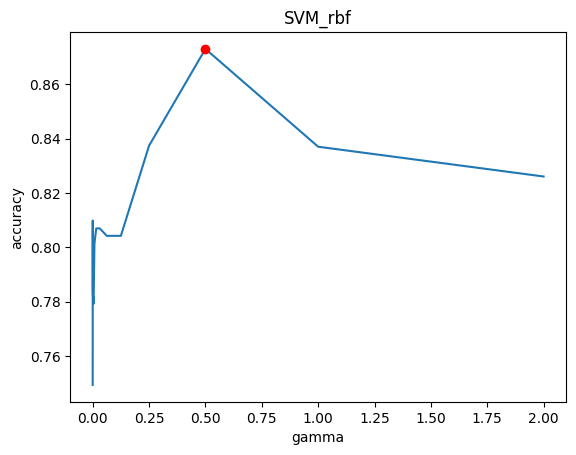

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [1.5],
            'gamma': gamma_rbf[0:18]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

plt.plot(gamma_rbf[0:18], gs_sv_r.cv_results_['mean_test_score'])
plt.plot(0.5, 0.8729832572298326, 'ro')


plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('SVM_rbf')

plt.show()

In [ ]:
param_sv_r = {'kernel': ['rbf'],
            'C': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3],
            'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]}
gs_sv_r = GridSearchCV(svc, param_sv_r, cv=5, scoring='accuracy')
%time gs_sv_r.fit(X_encoded, y01)
print(gs_sv_r.best_params_)
print(gs_sv_r.best_score_)

print(gs_sv_l.cv_results_['mean_test_score'])

#plt.plot([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3], gs_sv_r.cv_results_['mean_test_score'])
#plt.plot(1.5, 0.8729832572298326, 'ro')


#plt.xlabel('C')
#plt.ylabel('accuracy')
#plt.title('SVM_rbf')

#plt.show()

CPU times: user 11.5 s, sys: 28.8 ms, total: 11.5 s
Wall time: 11.6 s
{'C': 1.5, 'gamma': 0.5, 'kernel': 'rbf'}
0.8729832572298326
[0.75487062 0.74375951 0.75745814 0.7630137  0.77671233 0.76575342
 0.77127093 0.76849315 0.78215373 0.7848554  0.78493151 0.77370624
 0.75726788 0.74063927 0.74063927 0.73508371 0.71841705 0.70722983
 0.71818874 0.72366819 0.71815068]


In [ ]:
gs_sv_r.cv_results_

{'mean_fit_time': array([0.00667768, 0.00818639, 0.00791683, 0.0078433 , 0.00733037,
        0.00870481, 0.0077405 , 0.00767241, 0.00679297, 0.00761504,
        0.00742297, 0.00935836, 0.00809875, 0.00663953, 0.00797343,
        0.00768905, 0.00860872, 0.00810952, 0.0091702 , 0.00740161,
        0.00691071, 0.00678196, 0.00811515, 0.00680757, 0.00680299,
        0.00775738, 0.00671782, 0.00724349, 0.00950179, 0.00797801,
        0.00791745, 0.00792403, 0.0082067 , 0.0072772 , 0.00688882,
        0.00696163, 0.00759249, 0.00721965, 0.00706491, 0.00658712,
        0.00932908, 0.00774837, 0.00824394, 0.00707502, 0.00799866,
        0.00907984, 0.00691752, 0.00801463, 0.00737367, 0.00697956,
        0.00687242, 0.00722828, 0.00663886, 0.00737076, 0.00806971,
        0.0074553 , 0.00714202, 0.00778522, 0.00794988, 0.00744967,
        0.0069809 , 0.00704098, 0.00833507, 0.00824494, 0.0070066 ,
        0.00663476, 0.00719757, 0.00792518, 0.00871921, 0.0080533 ,
        0.00758386, 0.00719976,

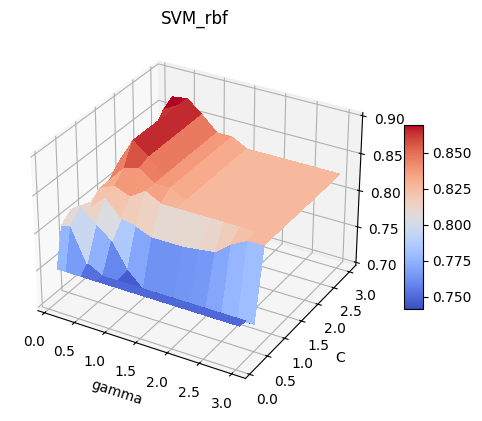

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
Y = np.array([0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
X, Y = np.meshgrid(X, Y)
Z = gs_sv_r.cv_results_['mean_test_score'].reshape(13,13)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.7, 0.9)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.1f}')

ax.set_xlabel('gamma')
ax.set_ylabel('C')
ax.set_zlabel('accuracy')
#plt.xlabel('gamma')
#plt.ylabel('C')
#plt.zlabel('gamma')
plt.title('SVM_rbf')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.5, aspect=10)

plt.show()

In [ ]:
gamma_poly = [2**_ for _ in range(-15,10)]
gamma_poly.insert(0,0)


param_sv_p = {'kernel': ['poly'],
            'C': [2**_ for _ in range(-15,10)],
            'gamma': gamma_poly,
            'degree': [2],
            'max_iter': [100000]}
gs_sv_p = GridSearchCV(svc, param_sv_p, cv=5, scoring='accuracy')
%time gs_sv_p.fit(X_encoded, y01)
print(gs_sv_p.best_params_)
print(gs_sv_p.best_score_)

#plt.plot([2**_ for _ in range(-15,10)], gs_sv_p.cv_results_['mean_test_score'])
#plt.plot(1, 0.8321612541993281, 'ro')


#plt.xlabel('C')
#plt.ylabel('accuracy')
#plt.title('SVM_poly')

#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).

CPU times: user 4min 35s, sys: 778 ms, total: 4min 36s
Wall time: 4min 37s
{'C': 3.0517578125e-05, 'degree': 2, 'gamma': 0.03125, 'kernel': 'poly', 'max_iter': 100000}
0.8070395738203958


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### LOR

In [ ]:
# solver:
# |         - 'lbfgs'           -   ['l2', None]
# |         - 'liblinear'       -   ['l1', 'l2']
# |         - 'newton-cg'       -   ['l2', None]
# |         - 'newton-cholesky' -   ['l2', None]
# |         - 'sag'             -   ['l2', None]
# |         - 'saga'            -   ['elasticnet', 'l1', 'l2', None]
# |
#help(lor)

In [ ]:
param_lo = {'penalty': ['l1', 'l2'],#, 'elasticnet', None],
            'C': [2**_ for _ in range(-15,10)],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X_encoded, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 1.63 s, sys: 4.9 ms, total: 1.63 s
Wall time: 1.63 s
{'C': 0.125, 'penalty': 'l1', 'solver': 'liblinear'}
0.7544901065449011


[0.74931507 0.74931507 0.74931507 0.74931507 0.74931507 0.74931507
 0.74375951 0.7216895  0.71343227 0.70787671 0.70787671 0.74383562
 0.75449011 0.73238204 0.72412481 0.72678843 0.71834094 0.72100457
 0.71537291 0.70981735 0.7042618  0.70148402 0.7042618  0.70148402
 0.69315068]


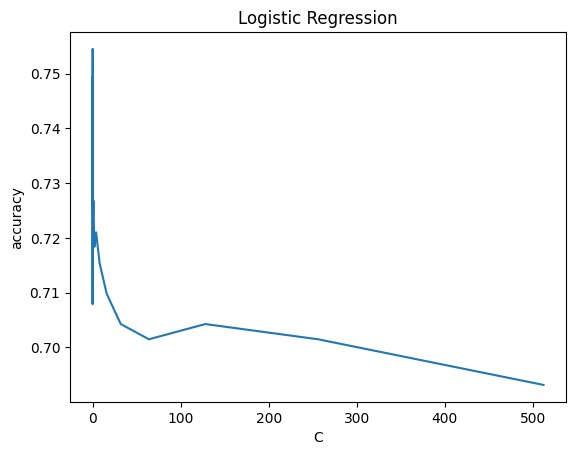

In [ ]:
param_lo = {'C': [2**_ for _ in range(-15,10)],
            'penalty': ['l1'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,10)], gs_lo.cv_results_['mean_test_score'])

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Logistic Regression')

plt.show()

[0.74931507 0.74931507 0.74931507 0.74931507 0.74931507 0.74931507
 0.74375951 0.7216895  0.71343227 0.70787671 0.70787671 0.74383562
 0.75449011 0.73238204 0.72412481]


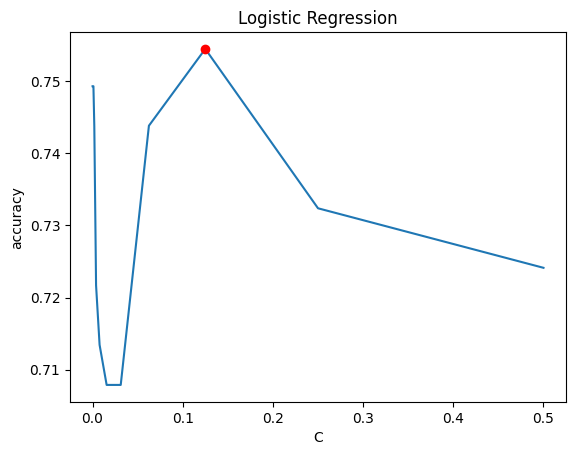

In [ ]:
param_lo = {'C': [2**_ for _ in range(-15,0)],
            'penalty': ['l1'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

plt.plot([2**_ for _ in range(-15,0)], gs_lo.cv_results_['mean_test_score'])
plt.plot(0.125, 0.7544901065449011, 'ro')

plt.xlabel('C')
plt.ylabel('accuracy')
plt.title('Logistic Regression')

plt.show()

In [ ]:
param_lo = {'C': [0.125],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
gs_lo.fit(X_encoded, y01)
print(gs_lo.cv_results_['mean_test_score'])

print(gs_lo.cv_results_['params'])

[0.75449011 0.71316591]
[{'C': 0.125, 'penalty': 'l1', 'solver': 'liblinear'}, {'C': 0.125, 'penalty': 'l2', 'solver': 'liblinear'}]


In [ ]:
param_lo = {'C':[0.125],
            'penalty': [None],
            'solver': ['lbfgs']}
gs_lo = GridSearchCV(lor, param_lo, cv=5, scoring='accuracy')
%time gs_lo.fit(X_encoded, y01)
print(gs_lo.best_params_)
print(gs_lo.best_score_)

CPU times: user 123 ms, sys: 3 ms, total: 126 ms
Wall time: 134 ms
{'C': 0.125, 'penalty': None, 'solver': 'lbfgs'}
0.7098173515981735


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: T

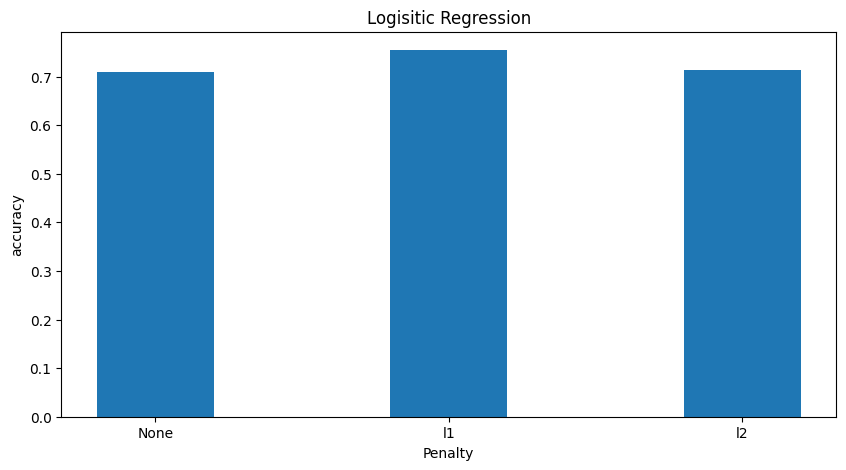

In [ ]:
lor_bar = {'None':0.7098173515981735, 'l1':0.7544901065449011  , 'l2':0.71316591}
courses = list(lor_bar.keys())
values = list(lor_bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)

plt.xlabel("Penalty")
plt.ylabel("accuracy")
plt.title('Logisitic Regression')
plt.show()

### DT

In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [132]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X_encoded, y01)
print(gs_dt.best_params_)
print(gs_dt.best_score_)


CPU times: user 11.1 s, sys: 23 ms, total: 11.2 s
Wall time: 11.2 s
{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'random'}
0.8645738203957383


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
param_dt = {'criterion': ['gini', 'entropy'],
         'splitter': ['random', 'best'],
         'max_depth': [13],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [132]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
%time gs_dt.fit(X_encoded, y01)
print(gs_dt.cv_results_['params'])
print(gs_dt.cv_results_['mean_test_score'])


CPU times: user 117 ms, sys: 0 ns, total: 117 ms
Wall time: 116 ms
[{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'best'}, {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'random'}, {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'best'}]
[0.86457382 0.7814688  0.79802131 0.78968798]


CPU times: user 2.61 s, sys: 8.93 ms, total: 2.62 s
Wall time: 2.62 s
{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'random'}
0.8645738203957383


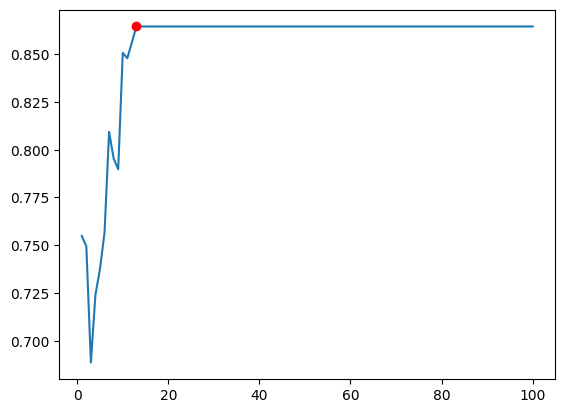

In [ ]:
param_dt_r = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [132]}

gs_dt_r = GridSearchCV(dtc, param_dt_r, cv = 5, scoring = "accuracy")
%time gs_dt_r.fit(X_encoded, y01)
print(gs_dt_r.best_params_)
print(gs_dt_r.best_score_)

plt.plot(range(1, 101), gs_dt_r.cv_results_['mean_test_score'])
plt.plot(13, 0.8645738203957383, 'ro')


CPU times: user 254 ms, sys: 4 ms, total: 258 ms
Wall time: 258 ms
{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 132, 'splitter': 'random'}
0.8645738203957383


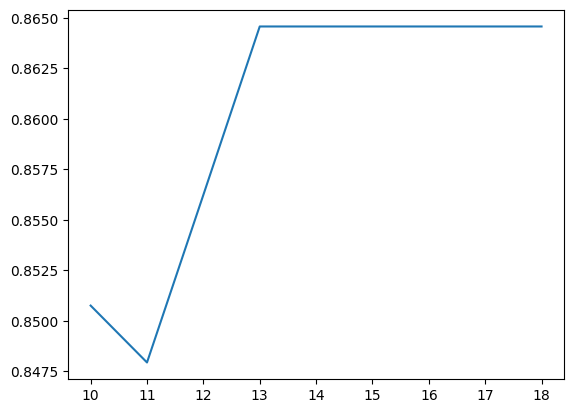

In [ ]:
param_dt_r = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': range(10, 19),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'random_state': [132]}

gs_dt_r = GridSearchCV(dtc, param_dt_r, cv = 5, scoring = "accuracy")
%time gs_dt_r.fit(X_encoded, y01)
print(gs_dt_r.best_params_)
print(gs_dt_r.best_score_)

plt.plot(range(10, 19), gs_dt_r.cv_results_['mean_test_score'])


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


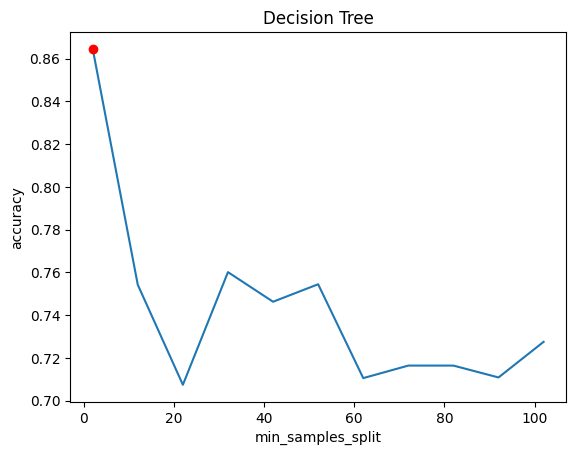

In [ ]:
param_dt = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': [13],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': [1],
         'random_state': [132]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X_encoded, y01)
gs_dt.cv_results_

plt.plot(range(2, 103, 10), gs_dt.cv_results_['mean_test_score'])
plt.plot(2, 0.8645738203957383, 'ro')

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Decision Tree')

plt.show()

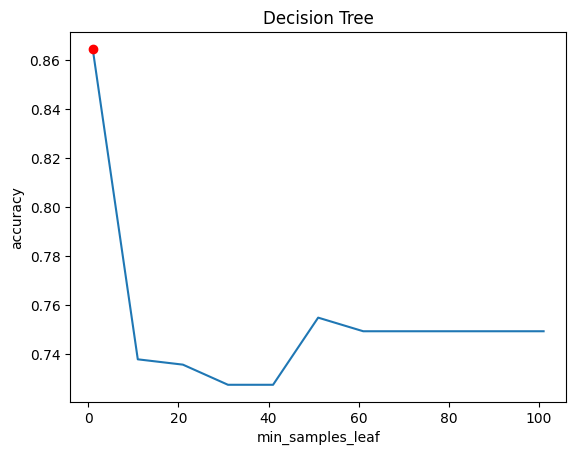

In [ ]:
param_dt = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': [13],
         'min_samples_split': [2],
         'min_samples_leaf': range(1, 102, 10),
         'random_state': [132]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X_encoded, y01)
gs_dt.cv_results_

plt.plot(range(1, 102, 10), gs_dt.cv_results_['mean_test_score'])
plt.plot(1, 0.8645738203957383, 'ro')

plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('Decision Tree')

plt.show()

In [ ]:
param_dt = {'criterion': ['gini'],
         'splitter': ['random'],
         'max_depth': [13],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': range(1, 102, 10),
         'random_state': [132]}

gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
gs_dt.fit(X_encoded, y01)
gs_dt.cv_results_

#plt.plot(range(1, 102, 10), gs_dt.cv_results_['mean_test_score'])
#plt.plot(1, 0.8645738203957383, 'ro')

#plt.xlabel('min_samples_leaf')
#plt.ylabel('accuracy')
#plt.title('Decision Tree')

#plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'mean_fit_time': array([0.00492902, 0.003585  , 0.00339756, 0.0030056 , 0.00296431,
        0.0032084 , 0.00350022, 0.00307479, 0.00294886, 0.00328155,
        0.00319419, 0.00313354, 0.00361037, 0.00310607, 0.00321131,
        0.00343919, 0.00314798, 0.0030725 , 0.00311532, 0.00300369,
        0.00290623, 0.00299706, 0.00301151, 0.00288825, 0.00349479,
        0.00293126, 0.00288   , 0.00293584, 0.0035851 , 0.00299883,
        0.00290985, 0.00361919, 0.00330281, 0.00363297, 0.00506649,
        0.0047142 , 0.00331287, 0.00280309, 0.00299296, 0.00325422,
        0.00281281, 0.00293679, 0.00327029, 0.00345259, 0.00288911,
        0.00305595, 0.00289307, 0.00315318, 0.00285707, 0.00278645,
        0.00281796, 0.00278735, 0.00280628, 0.00283227, 0.0029314 ,
        0.00308442, 0.00298204, 0.00280862, 0.0029285 , 0.00292935,
        0.00331631, 0.00298853, 0.00271416, 0.0036128 , 0.00407186,
        0.0031846 , 0.00298886, 0.0028326 , 0.00283623, 0.00407734,
        0.00309386, 0.00282555,

In [ ]:
len(Z)

121

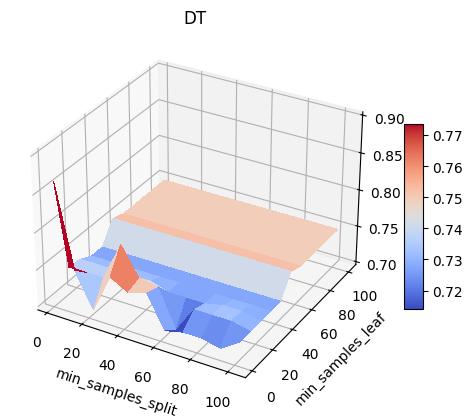

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.array(range(2, 103, 10))
Y = np.array(range(1, 102, 10),)
X, Y = np.meshgrid(X, Y)
Z = gs_dt.cv_results_['mean_test_score'].reshape(11,11)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.7, 0.9)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.1f}')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('min_samples_leaf')
ax.set_zlabel('accuracy')
#plt.xlabel('gamma')
#plt.ylabel('C')
#plt.zlabel('gamma')
plt.title('DT')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.5, aspect=10)

plt.show()

In [ ]:
best = 0

for i in range(200, 222):
  param_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['random', 'best'], 'max_depth': range(1, 101), 'min_samples_split': [2], 'min_samples_leaf': [1], 'random_state': [i]}
  gs_dt = GridSearchCV(dtc, param_dt, cv = 5, scoring = "accuracy")
  gs_dt.fit(X_encoded, y01)
  if gs_dt.best_score_ > best:
    best = gs_dt.best_score_
    print(i, gs_dt.best_score_)
  if i % 10 == 0:
    print(i)


200 0.8036910197869102
200
201 0.8120243531202433
202 0.8396499238964992
209 0.8398021308980212
210
220


### RF

In [ ]:
param_rf = {'criterion': ['gini', 'entropy'],
         'max_depth': range(1, 21),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)
print(gs_rf.best_params_)
print(gs_rf.best_score_)


CPU times: user 6min 5s, sys: 1.29 s, total: 6min 6s
Wall time: 6min 8s
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: user 7.78 s, sys: 28 ms, total: 7.81 s
Wall time: 7.91 s
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


Text(0.5, 1.0, 'Random Forest')

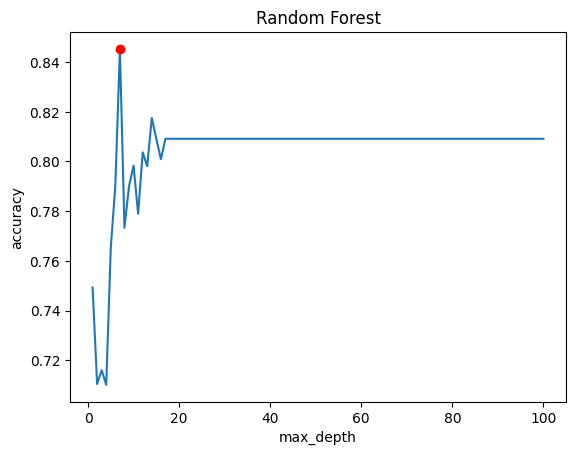

In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': range(1, 101),
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(1, 101), gs_rf.cv_results_['mean_test_score'])
plt.plot(7, 0.8453576864535768, 'ro')


plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 8.25 s, sys: 37 ms, total: 8.29 s
Wall time: 8.29 s
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


Text(0.5, 1.0, 'Random Forest')

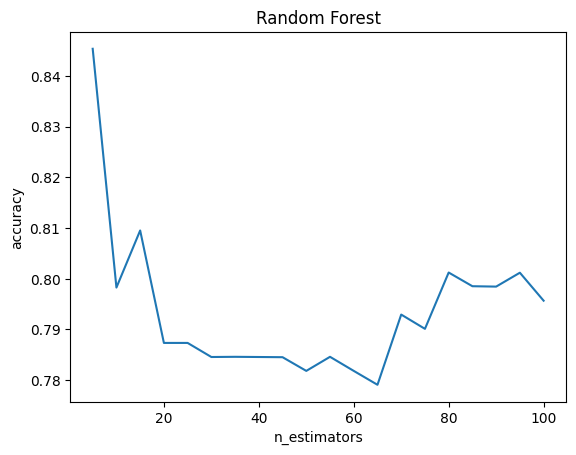

In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': [7],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(5, 101, 5),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(5, 101, 5), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 680 ms, sys: 2 ms, total: 682 ms
Wall time: 682 ms
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


Text(0.5, 1.0, 'Random Forest')

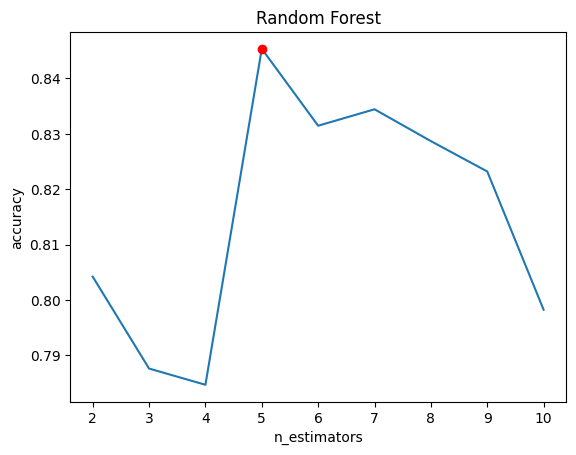

In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': [7],
         'min_samples_split': [2],
         'min_samples_leaf': [1],
         'n_estimators': range(2, 11),
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(2, 11), gs_rf.cv_results_['mean_test_score'])
plt.plot(5, 0.8453576864535768, 'ro')

plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 730 ms, sys: 3.01 ms, total: 733 ms
Wall time: 733 ms
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


Text(0.5, 1.0, 'Random Forest')

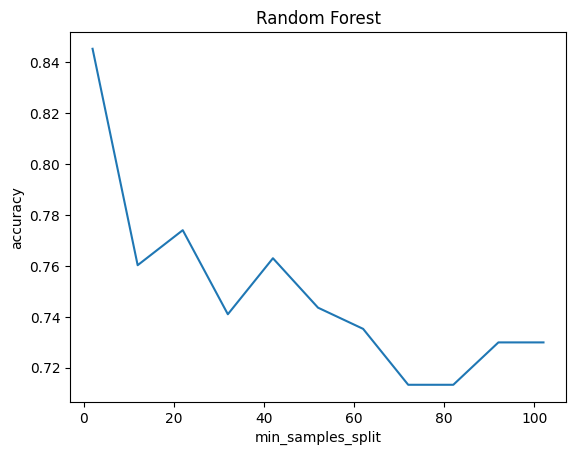

In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': [7],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': [1],
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(2, 103, 10), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('Random Forest')



CPU times: user 720 ms, sys: 4.99 ms, total: 725 ms
Wall time: 725 ms
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5, 'random_state': 131}
0.8453576864535768


Text(0.5, 1.0, 'Random Forest')

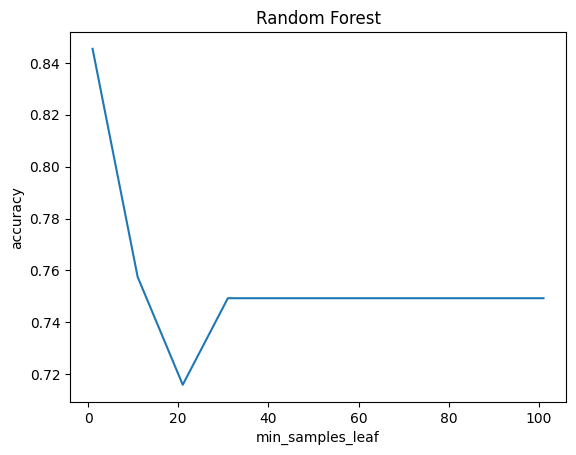

In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': [7],
         'min_samples_split': [2],
         'min_samples_leaf': range(1, 103, 10),
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

plt.plot(range(1, 103, 10), gs_rf.cv_results_['mean_test_score'])

plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.title('Random Forest')



In [ ]:
param_rf = {'criterion': ['entropy'],
         'max_depth': [7],
         'min_samples_split': range(2, 103, 10),
         'min_samples_leaf': range(1, 103, 10),
         'n_estimators': [5],
         'random_state': [131]}

gs_rf = GridSearchCV(rfc, param_rf, cv = 5, scoring = "accuracy")
%time gs_rf.fit(X_encoded, y01)
gs_rf.cv_results_

#plt.plot(range(1, 102, 10), gs_dt.cv_results_['mean_test_score'])
#plt.plot(1, 0.8645738203957383, 'ro')

#plt.xlabel('min_samples_leaf')
#plt.ylabel('accuracy')
#plt.title('Decision Tree')

#plt.show()

CPU times: user 8.76 s, sys: 50.6 ms, total: 8.81 s
Wall time: 8.82 s


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'mean_fit_time': array([0.02093406, 0.01984239, 0.01352472, 0.01119838, 0.01126003,
        0.01077418, 0.01073003, 0.01045794, 0.01484938, 0.01185417,
        0.01160707, 0.01072121, 0.01076226, 0.01150179, 0.01087589,
        0.01210861, 0.01009378, 0.010355  , 0.01008101, 0.01003695,
        0.01010461, 0.0116559 , 0.0135304 , 0.01067696, 0.01004348,
        0.00993176, 0.01076441, 0.01062179, 0.01016774, 0.0102591 ,
        0.01104994, 0.01013718, 0.01030221, 0.01010451, 0.0108849 ,
        0.01073971, 0.01208587, 0.01065841, 0.01002469, 0.01006064,
        0.01110568, 0.01100888, 0.01040568, 0.01093712, 0.01005645,
        0.01051292, 0.01054273, 0.01199808, 0.01194887, 0.01035781,
        0.01246562, 0.00999537, 0.01019998, 0.01038151, 0.01092639,
        0.0120357 , 0.01197877, 0.01131887, 0.01007733, 0.01011639,
        0.01044836, 0.00999064, 0.0099462 , 0.00981541, 0.01153598,
        0.01360192, 0.01017938, 0.00990515, 0.01021628, 0.01043305,
        0.00987177, 0.01100955,

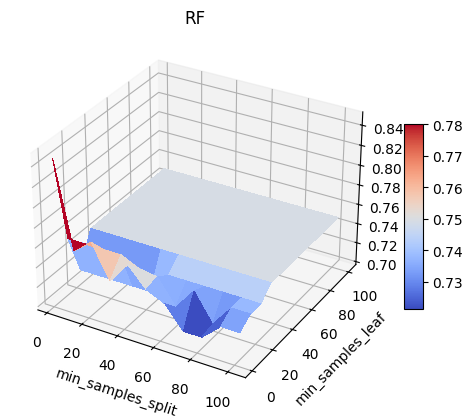

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.array(range(2, 103, 10))
Y = np.array(range(1, 102, 10),)
X, Y = np.meshgrid(X, Y)
Z = gs_rf.cv_results_['mean_test_score'].reshape(11,11)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0.7, 0.85)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.1f}')

ax.set_xlabel('min_samples_split')
ax.set_ylabel('min_samples_leaf')
ax.set_zlabel('accuracy')
#plt.xlabel('gamma')
#plt.ylabel('C')
#plt.zlabel('gamma')
plt.title('RF')

# Add a color bar which maps values to colors.
fig.colorbar(surf, location='right', shrink=0.5, aspect=10)

plt.show()

## Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y01, test_size= 0.2, random_state= 2)

In [ ]:
#initialize

knc = KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')
svc = SVC(C=2, gamma=0.5, kernel='rbf')
lor = LogisticRegression(C=0.125, penalty='l1', solver='liblinear')
dtc = DecisionTreeClassifier(criterion='gini', max_depth=13, min_samples_leaf=1, min_samples_split=2, random_state=132, splitter='random')
rfc = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=5, random_state=131)


In [ ]:
df['v01'].value_counts(sort = True)


,count
v01,
0,272
1,91


Text(0.5, 1.0, 'Percentage of Viability in Dataset')

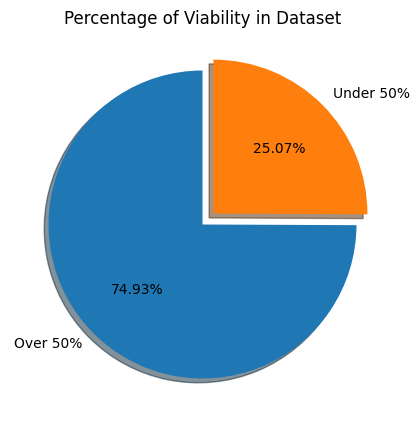

In [ ]:
# Data to plot
sizes = df['v01'].value_counts(sort = True)

rcParams['figure.figsize'] = 5,5 # Plot

plt.pie(sizes, explode = (0,0.1), labels=["Over 50%", "Under 50%"], autopct='%.2f%%', shadow=True, startangle=90)

plt.title('Percentage of Viability in Dataset')

In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_knc = cross_val_score(knc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_knc.mean(), kf_knc.std())

0.8649543378995433 0.0164928770584102


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_svc = cross_val_score(svc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_svc.mean(), kf_svc.std())

0.8759132420091325 0.020239239196647902


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_lor = cross_val_score(lor, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_lor.mean(), kf_lor.std())

0.7904870624048707 0.05091409518024363


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_dtc = cross_val_score(dtc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_dtc.mean(), kf_dtc.std())

0.8622526636225267 0.008833416963518326


In [ ]:
kf = KFold(n_splits=5, shuffle=True)
kf_rfc = cross_val_score(rfc, X_encoded, y01, cv=kf, scoring='accuracy')
print(kf_rfc.mean(), kf_rfc.std())

0.840296803652968 0.04872906618877015


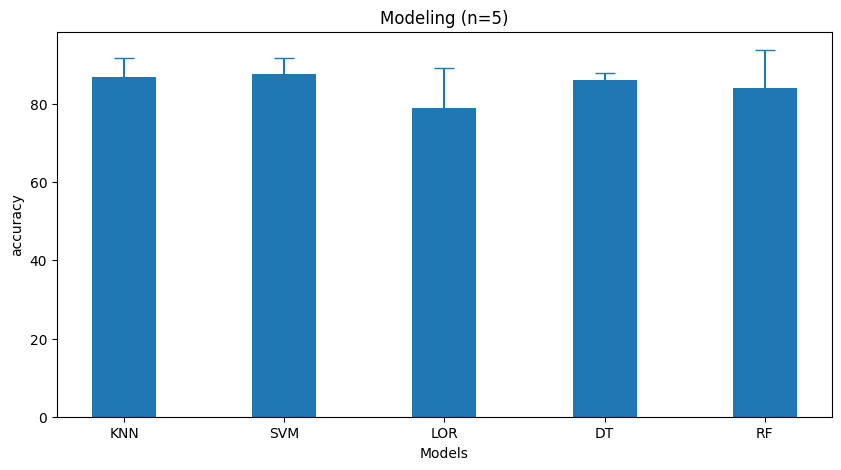

In [ ]:
#Visualize

bar = {'KNN':86.78843226788432  , 'SVM':87.59171385083713 , 'LOR':79.048717656012176 , 'DT':86.22526347031964 , 'RF':84.0296803652968}
error = np.array([2.505574130029742, 2.0423965889629666, 5.09147515297116043, 0.8833174951009987, 4.872595160363493])
courses = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, width = 0.4)
plt.errorbar(courses, values, error*2, capsize=7, linestyle='None')

plt.xlabel("Models")
plt.ylabel("accuracy")
plt.title('Modeling (n=5)')
plt.show()


In [ ]:
#fit

knc.fit(X_train, y_train)
svc.fit(X_train, y_train)
lor.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=5,
                       random_state=131)

In [ ]:
# predict

knc_pred = knc.predict(X_test)
svc_pred = svc.predict(X_test)
lor_pred = lor.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)


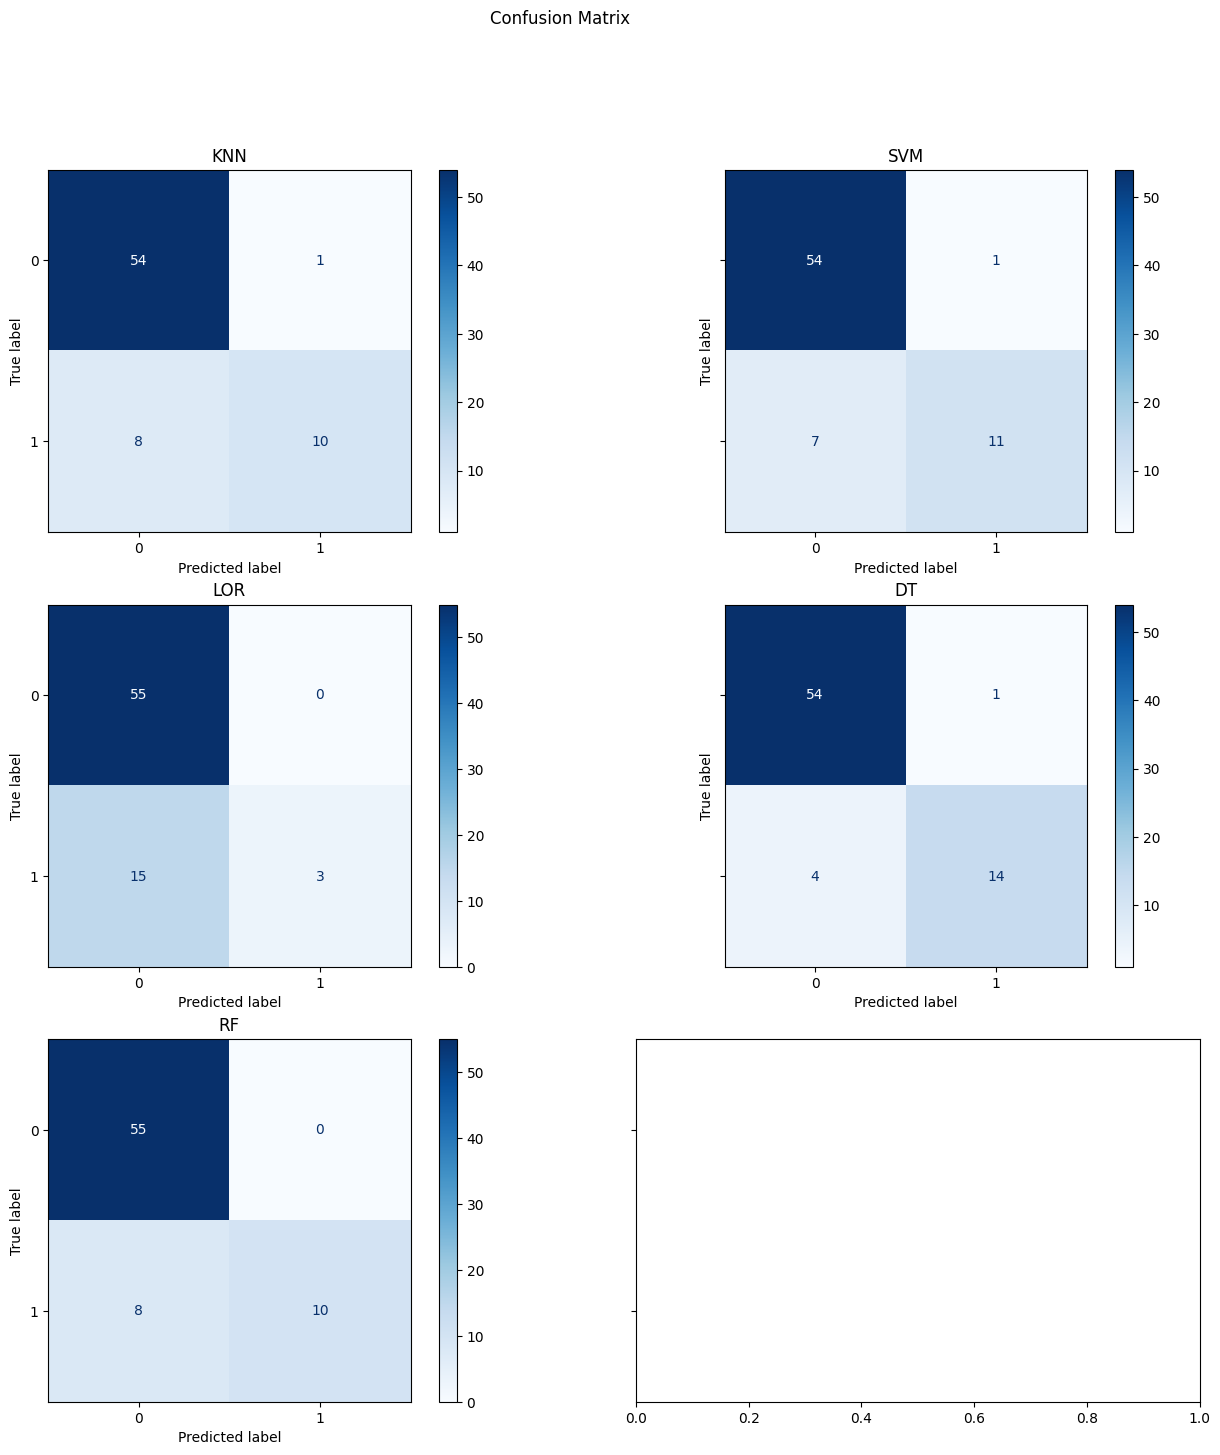

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 16), sharey=True)
fig.suptitle('Confusion Matrix')

cm_knc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, knc_pred))
cm_svc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, svc_pred))
cm_lor = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, lor_pred))
cm_dtc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, dtc_pred))
cm_rfc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, rfc_pred))


axes[0, 0].set_title('KNN')
cm_knc.plot(cmap='Blues', ax=axes[0, 0])

axes[0, 1].set_title('SVM')
cm_svc.plot(cmap='Blues', ax=axes[0, 1])

axes[1, 0].set_title('LOR')
cm_lor.plot(cmap='Blues', ax=axes[1, 0])

axes[1, 1].set_title('DT')
cm_dtc.plot(cmap='Blues', ax=axes[1, 1])

axes[2, 0].set_title('RF')
cm_rfc.plot(cmap='Blues', ax=axes[2, 0])

plt.show()

In [ ]:
print(classification_report(y_test, knc_pred))
print(classification_report(y_test, svc_pred))
print(classification_report(y_test, lor_pred))
print(classification_report(y_test, dtc_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.91      0.56      0.69        18

    accuracy                           0.88        73
   macro avg       0.89      0.77      0.81        73
weighted avg       0.88      0.88      0.87        73

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.92      0.61      0.73        18

    accuracy                           0.89        73
   macro avg       0.90      0.80      0.83        73
weighted avg       0.89      0.89      0.88        73

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        55
           1       1.00      0.17      0.29        18

    accuracy                           0.79        73
   macro avg       0.89      0.58      0.58        73
weighted avg       0.84      0.79      0.73        73

              preci

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = SVC(kernel=kernel, C=2, gamma=0.5).fit(X_train_td, y_train)

    # Check the shape of X and support vectors
    print(f"Shape of X: {X_train_td.shape}")
    print(f"Shape of support vectors: {clf.support_vectors_.shape}")

    # Ensure X is 2-dimensional with two columns
    if X_train_td.ndim != 2 or X_train_td.shape[1] != 2:
        raise ValueError("X should be a 2-dimensional array with two columns.")

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    #x_min, x_max, y_min, y_max = -3, 3, -3, 3
    #ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X_train_td, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Ensure support vectors are 2D
        if clf.support_vectors_.ndim != 2 or clf.support_vectors_.shape[1] != 2:
            raise ValueError("Support vectors should be a 2-dimensional array with two columns.")

        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    scatter = ax.scatter(X_train_td['time'], X_train_td['dose'], c=y_train, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()


Shape of X: (290, 2)
Shape of support vectors: (141, 2)


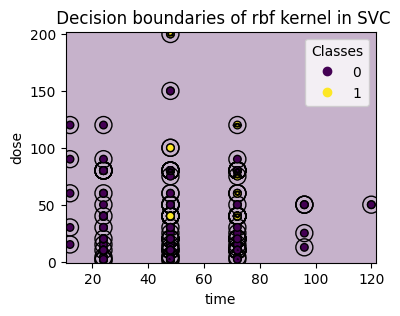

In [ ]:
plot_training_data_with_decision_boundary("rbf")


In [ ]:
70/290

0.2413793103448276

In [ ]:
X

,time,dose
0,24,10.0
1,24,20.0
2,24,40.0
3,24,80.0
4,48,10.0
...,...,...
358,48,12.5
359,48,25.0
360,48,50.0
361,48,100.0


In [ ]:
y01

,v01
0,0
1,0
2,0
3,0
4,0
...,...
358,0
359,0
360,0
361,1


In [ ]:
y01

,v01
0,0
1,0
2,0
3,0
4,0
...,...
358,0
359,0
360,0
361,1


In [ ]:
help(plot_tree)

Help on function plot_tree in module sklearn.tree._export:

plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
    Plot a decision tree.
    
    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    
    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.
    
    Read more in the :ref:`User Guide <tree>`.
    
    .. versionadded:: 0.21
    
    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be plotted.
    
    max_depth : int, default=None
        The maximum depth of the representation. If None, the tree is fully
        generated.
    
    feature_names : array-like of str, default=None
        Na

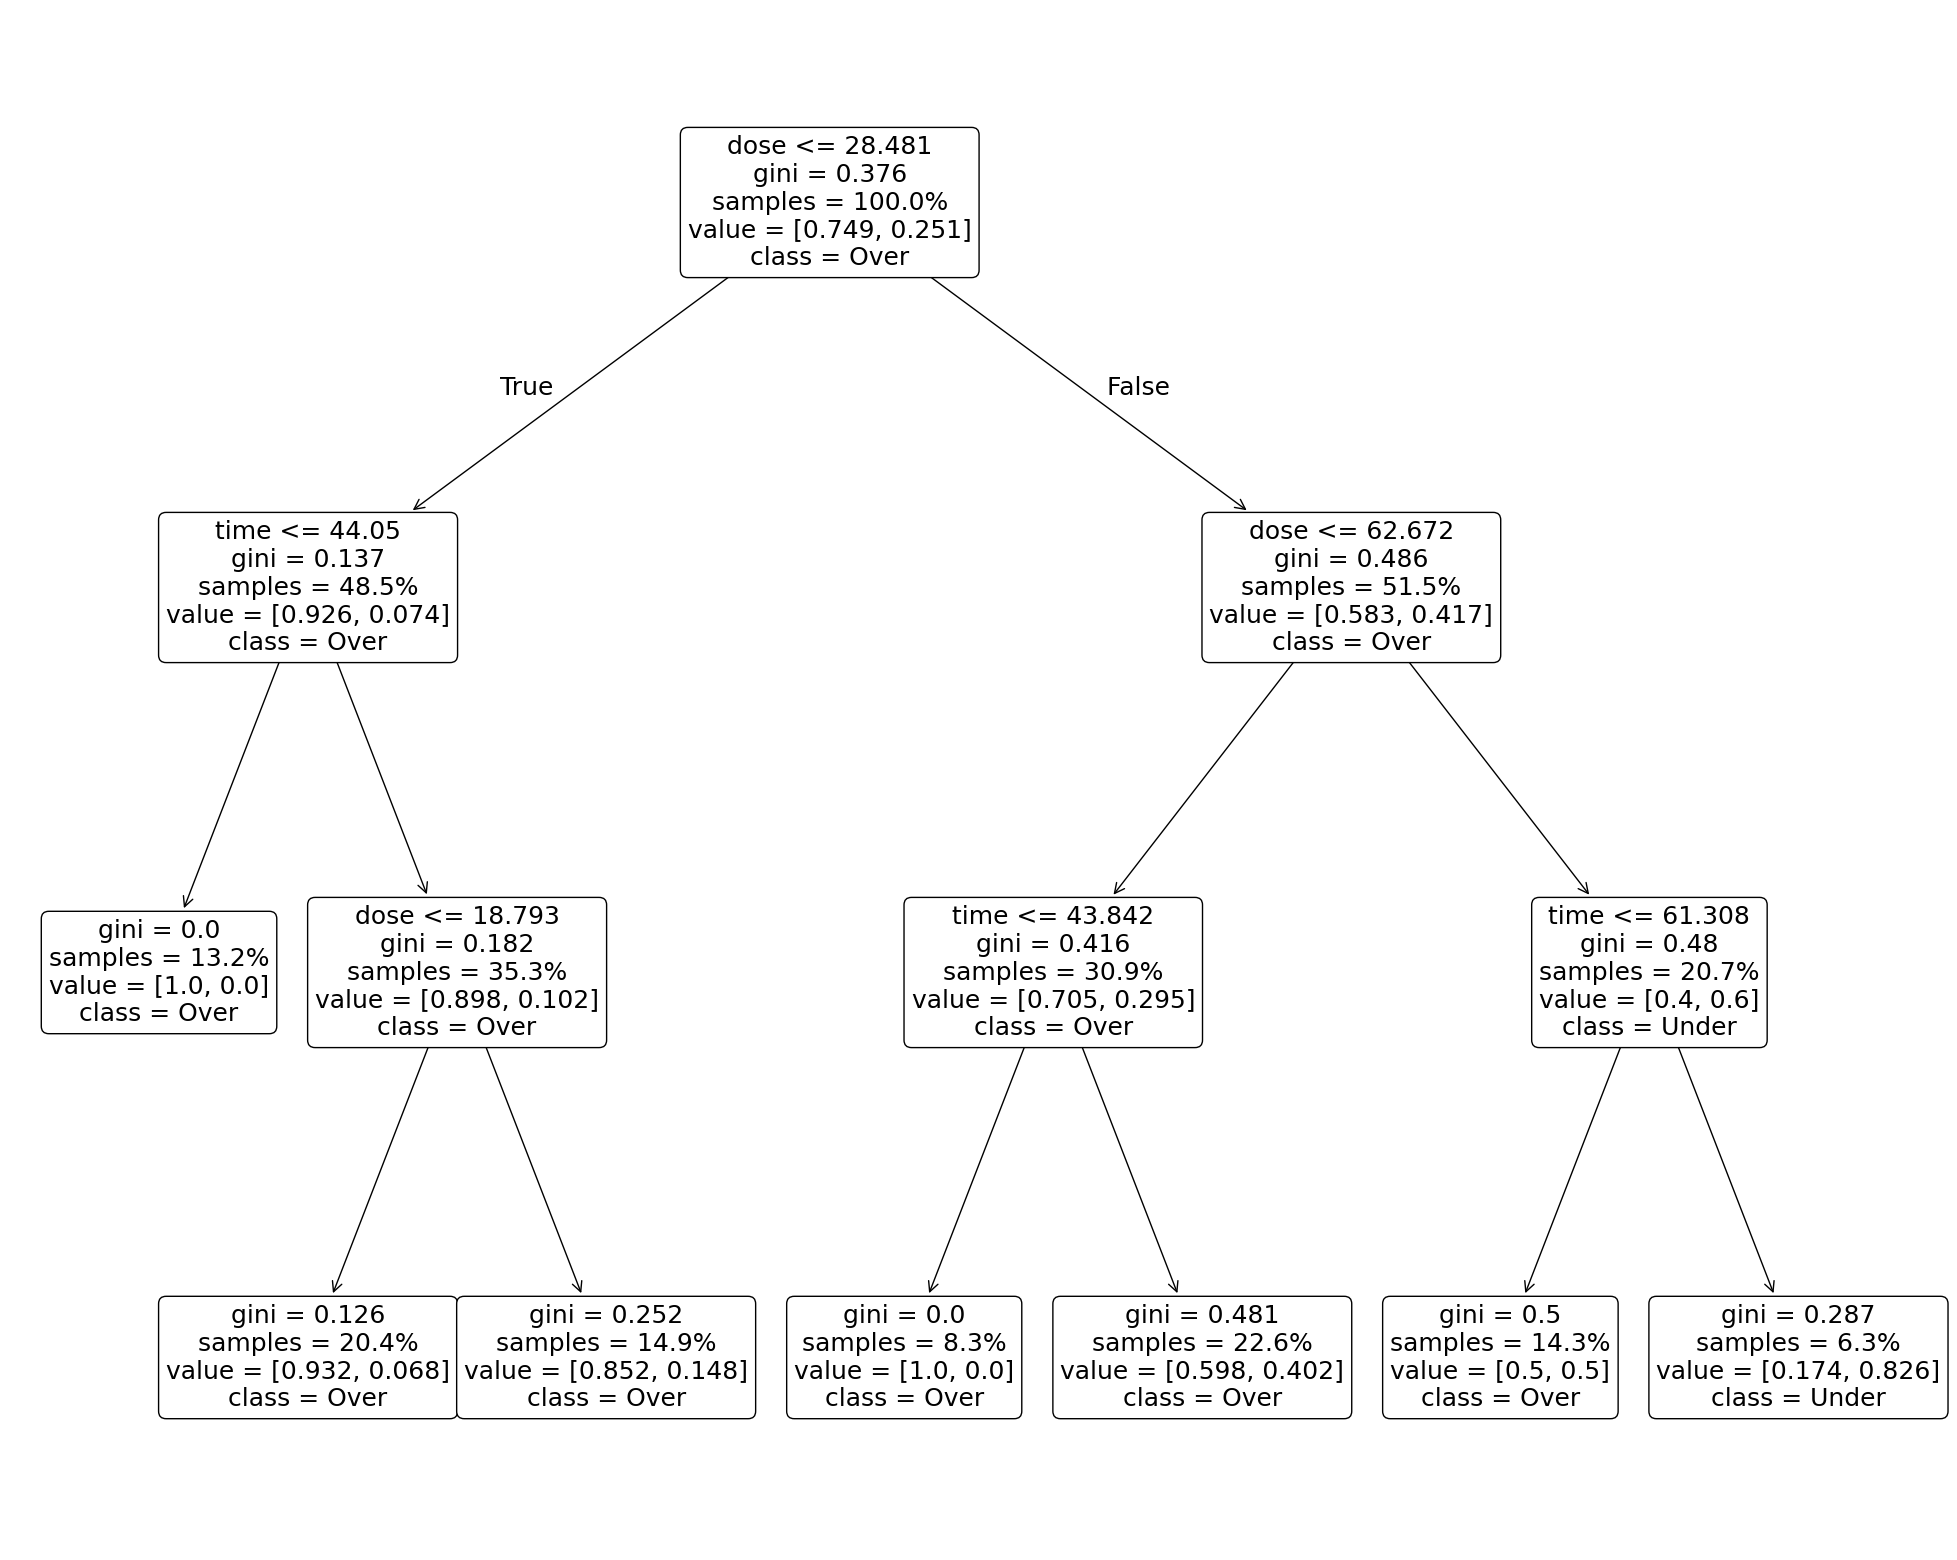

In [ ]:
#Final Model

dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=1, min_samples_split=2, random_state=132, splitter='random')
dtc.fit(X, y01)
dtc_pred = dtc.predict(X)

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, feature_names=['time', 'dose'], class_names=['Over', 'Under'], filled=False, proportion=True, rounded=True)
plt.show()

In [ ]:
accuracy_score(y01, dtc_pred)

0.790633608815427